# Ancient texts: Get sentiment
#### This notebook contains
Modern sentiment analyses performed on translations of an ancient text corpus\
For a discussion of the data set see the notebook `Ancient texts: Exploratory Data Analysis (EDA) and preparation`

*Goals*
* To discover which text genres (`B_category`) are deemed the most positive, negative, and/or subjective using TextBlob and NLTK sentimentanalyzer
* To discover which gods (`God`) have the most positive, negative, and/or subjective texts using TextBlob and NLTK sentimentanalyzer

*Questions to answer*
* Do different genres exhibit different polarities and subjectivities?
* Do different god-groupings exhibit different polarities and subjectivities?
* Do different person-groupings exhibit different polarities and subjectivities?

*Problems*
* The texts can be highly fragmentary, therefore many sentences are incomplete or have breaks
* There are many translation notes within the texts which need to be removed
* The texts are translations of compositions created thousands of years ago
  * will modern sentiment/polarities align with modern  sensibilities?
  * does this matter for a clustering model or can insights still be found?

### Steps
#### Prepare text for analysis
* Americanize the text for the sentiment analysis as this is possibly important for algorithmic analyses which can be sensitive to non-American spellings
  * check texts for most common differences and alter if warranted 
* Clean text more rigorously
  * perform basic NLP readying
  * remove punctuation
  * remove translation notes
* Tokenize text
  * tokenize into sentences

#### Get sentiment and polarity scores
* TextBlob: 2 methods
  * get polarity/subjectivity scores for each sentence in a text & then aggregate sentences
  * get polarity/subjectivity scores for whole compositions
* NLTK sentimentanalyzer
  * just polarity for whole compositions

#### Perform analyses and plot visuals

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import NLP libraries
import re
import string
import nltk
from nltk.tokenize import sent_tokenize

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
df0 = pd.read_csv('all_texts_cleaned_1.csv')
df0.head(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ..."


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   A_category    381 non-null    object
 1   B_category    381 non-null    object
 2   Period        151 non-null    object
 3   Dynasty       151 non-null    object
 4   God           238 non-null    object
 5   2nd_god       10 non-null     object
 6   Other_divine  28 non-null     object
 7   Person        184 non-null    object
 8   Number        381 non-null    object
 9   Title         381 non-null    object
 10  Place         28 non-null     object
 11  Text          381 non-null    object
dtypes: object(12)
memory usage: 35.8+ KB


In [4]:
# Get unique genre categories and count
print(df0.B_category.nunique())
df0.B_category.unique()

25


array(['Narratives featuring deities', 'Narratives featuring heroes',
       'King lists and other compositions', 'City laments',
       'Royal praise poetry and hymns to deities on behalf of rulers',
       'Praise poetry and hymns for unknown rulers',
       'Royal correspondence', 'Other letters and letter-prayers',
       'Hymns addressed to deities',
       'Hymns addressed to or concerning temples', 'School stories',
       'Debate poems', 'Dialogues and diatribes', 'Personal laments',
       'Reflective compositions', 'Lu-digira compositions',
       'Types of song', 'Didactic compositions', 'Short tales',
       'Offering compositions', 'Other', 'Lexical compositions',
       'Animal fables', 'Proverb collections', 'Other proverbs'],
      dtype=object)

In [5]:
# Get unique gods and count
print(df0.God.nunique())
df0.God.unique()

46


array(['Enki', 'Enlil', 'Inana', 'Inana and Dumuzid', 'Nanna-Suen',
       'Ninurta', 'Martu', 'Ningishzida', 'Gods', nan, 'Pabilsag', 'Bau',
       'Nanna', 'Utu', 'Ninlil', 'Nergal', 'An', 'Suen', 'Meshlamta-ea',
       'Kindattu', 'Nanaya', 'Ninisina', 'Ninsiana', 'Ningublaga',
       'Nuska', 'Dagan', 'Ishkur', 'Numushda', 'Haia', 'Asarluhi',
       'Marduk', 'Nintinuga', 'personal deity', 'Ninshubur', 'Damgalnuna',
       'Hendursaga', 'Nanshe', 'Ninazu', 'Ninimma', 'Ninkasi', 'Nintur',
       'Nisaba', 'Nungal', 'Shara', 'Shul-pa-e', 'Sadarnuna', 'Kusu'],
      dtype=object)

In [6]:
# Get unique persons and count
print(df0.Person.nunique())
df0.Person.unique()

45


array([nan, 'Shu-kale-tuda', 'Geshtinana', 'Bilulu', 'Gilgamesh',
       'Lugalbanda', 'Enmerkar', 'Sargon', 'Utu-hegal', 'Gudea', 'Luma',
       'Ur-Namma', 'Shulgi', 'Amar-Suena', 'Shu-Suen', 'Ibbi-Suen',
       'Ishbi-Erra', 'Shu-ilishu', 'Iddin-Dagan', 'Ishme-Dagan',
       'Lipit-Eshtar', 'Ur-Ninurta', 'Bur-Suen', 'Enlil-bani', 'Gungunum',
       'Suen-iddinam', 'Suen-iqisham', 'Rim-Suen', 'Anam', 'Hammu-rabi',
       'Samsu-iluna', 'Abi-Eshuh', 'Ur-saga', 'Lugal-nesage', 'Ur-Enlila',
       'Aba-tah-lugalga', 'Ugubi', 'Shamash-tab', 'Inanaka', 'Inim-Inana',
       'Nanna-manshum', 'Inim-Enlila', 'Kug-Nanna', 'Enkimdu', 'Rulers',
       'Lu-digira'], dtype=object)

In [7]:
# Check out example text
df0.Text.loc[13]

'1-28.   "…… my ……. …… my lacerated eyes ……. …… my lacerated nose ……. …… my beaten ……. …… my hasty ……. …… my ……  1 line fragmentary  …… my ……. …… my loaded waggon ……. …… my ……. …… my ……. …… who is cheerful ……. …… who laments ……. …… the door of the gate ( of the nether world )  ……. My brother, …… the door of the gate ……  1 line fragmentary  …… ladyship (?) ……. On the mighty river, ……. …… its fields, a waterskin ……. …… in lamenting ……. …… my …… hated ……. My brother, your feet hurt, your feet …… the road. My brother, wherever you go I will hasten with you.  Dumuzid , wherever you go I will hasten with you. …… I will hasten with you. I will hasten with you. …… going (?) as your slavegirl, …… of the lord, I ……. …… of the lord …… …… going (?) as your slavegirl, …… of the lord, I ……." 29-34.   "My brother -- because of him I cannot rejoice. My brother …….  Dumuzid , my brother -- because of him I cannot rejoice, ……. …… in front of him ……. …… he who bound his arms went in front of him. …… he w

In [8]:
# Check out example text
df0.Text.loc[125]

"1-14.   Lipit- Eštar , proud king, enthroned prince, most seemly offshoot of kingship, who walks like  Utu , brilliant light of the Land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favoured by  Enlil , beloved by  Ninlil , trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good headdress, who  {holds in his hand} {( 1 ms. has instead: )  is perfect with} the sceptre over the black-headed, prince  Lipit- Eštar , son of  Enlil , wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by  An ! Your trust is put in Mother  Ninlil ;  Lipit- Eštar , you exert great power. 15-24.  You who speak as sweet as honey, whose name suits the mouth, longed-for husband of  Inana , to whom  Enki  gave broad wisdom as a gift!  Nisaba , the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers 

##### Observation: certain punctuation should be removed, British spellings to American, and numbers should be removed in addition to copyright and other in-line comments

## Prepare text for analysis
* address name of god An, since lowercase 'an' will be read as an indefinite article
* Americanize texts for the sentiment analysis as this is possibly important. Algorithmic analyses which can be sensitive to non-American spellings
  * check texts for most common differences and alter if warranted 
* clean text
  * remove certain punctuation
  * remove translation notes
  * additional measures
    * fix spaces by dashes where *dingirs* were
    * capture spaces between commas and periods
    * remove punction only sentences
* tokenize text
  * tokenize into sentences

### Address name of god An
* the name An will be lowercased and will be read as the indeterminative 'an' and removed or confused
* create regex to change all 'An' to 'Anu'

* create loop using lambda function
  * interate using .apply() method to go through each observation in 'Text' and assign value to x
  * use lambda function to apply substitution (re.sub) to each x

In [9]:
df = df0.copy()

# Replace 'An' with 'Anu' while keeping 'an' unchanged
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\bAn\b', 'Anu', x)) # \b\b = a word boundary, to only capture 'An'

In [10]:
df.Text.loc[125]

"1-14.   Lipit- Eštar , proud king, enthroned prince, most seemly offshoot of kingship, who walks like  Utu , brilliant light of the Land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favoured by  Enlil , beloved by  Ninlil , trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good headdress, who  {holds in his hand} {( 1 ms. has instead: )  is perfect with} the sceptre over the black-headed, prince  Lipit- Eštar , son of  Enlil , wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by  Anu ! Your trust is put in Mother  Ninlil ;  Lipit- Eštar , you exert great power. 15-24.  You who speak as sweet as honey, whose name suits the mouth, longed-for husband of  Inana , to whom  Enki  gave broad wisdom as a gift!  Nisaba , the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers

### Americanize text?
Investigate text for common differences
* 'our' vs 'or'
* 'tre' vs 'ter'
* 'lyse' vs 'lyze'
* 'ence' vs 'ense'

Create re pattern: r'(\w*?\w*(yse|our|tre|ence)\w*)'
* \w*? captures any characters leading up to the specified endings(yse|our|tre|ence) without being greedy
* \w* captures any characters that may follow, so words aren't truncated

In [11]:
# Find words that contain yse, our, tre, and ence 
brit_patterns = r'(\w*?\w*(yse|our|tre|ence)\w*)'

# Extract all to a list as string
brit_words = df['Text'].str.extractall(brit_patterns)[0].tolist() 

# Display only unique extracted words
unique = np.unique(brit_words)
unique

array(['Colourful', 'Distress', 'Four', 'Fourth', 'Fourthly',
       'Henceforth', 'Journey', 'Mistress', 'Nourished', 'Pour',
       'Pouring', 'Reverence', 'Rumours', 'Silence', 'Splendour',
       'Strength', 'Stretch', 'Stretching', 'Your', 'absence', 'arbour',
       'armour', 'audience', 'behaviour', 'belligerence', 'benevolence',
       'buttress', 'buttressed', 'buttresses', 'centre', 'centres',
       'clamour', 'colour', 'coloured', 'colourful', 'colourfully',
       'confidence', 'courage', 'courier', 'couriers', 'course', 'court',
       'courtesan', 'courtyard', 'courtyards', 'defences', 'deference',
       'devour', 'devoured', 'devouring', 'devours', 'difference',
       'discourses', 'distress', 'distressed', 'distressing', 'downpour',
       'downstream', 'eloquence', 'emergence', 'eminence', 'eminences',
       'encourage', 'encouraged', 'encouragement', 'encouraging',
       'encouragingly', 'entourage', 'entreat', 'entreated', 'entreaties',
       'entreats', 'entre

#### Results
British spellings to be changed:

**'our' vs 'or'**'
  *  'colour', 'coloured', 'colourful', 'colourfully', 'rumours', 'splendour', 'splendours', 'arbour', 'armour', 'behaviour', 'clamour', 'favour', 'favourable', 'favourably', 'favoured', 'favourite', 'favours', 'unfavourable', 'flavoured', 'harbour', 'honour', 'honourable', 'honoured', 'honours', 'humour', 'labour', 'laboured', 'labourer', 'labourers', 'labours', 'multicoloured', 'neighbour', 'neighbourhood', 'neighbourliness', 'neighbours', 'odour', 'savours', 'succour', 'valour', 'vigour'

**'tre' vs 'ter'**'
  * 'centre', 'centres', 'litre', 'litres', 'lustre', 'saltpetre', 'sceptre', 'sceptres'

**'lyse' vs 'lyze'**'
  * ' paralysed '

**'ence' vs 'ense'**'
  * ' defences', ' offence ', 'offences', ' ocurrences' (this latter is just misspelled)

#### Steps
* create function using `replace()` to change endings on certain words containing in 'our' or 'tre' 
* add paralysed, defences, offence, and ocurrences to the replacements list

In [12]:
def convert_british_to_american(text):

    text = text.lower() # Convert text to lowercase
    
    # Define words to replace 'our' with 'or'
    words_to_replace_our = [
        'colour', 'rumours', 'splendour', 'splendours', 'arbour', 
        'armour', 'behaviour', 'clamour', 'favour', 'favourable', 
        'flavoured', 'harbour', 'honour', 'humour', 'labour', 
        'multicoloured', 'neighbour', 'odour', 'savours', 
        'succour', 'valour', 'vigour'
    ]
    
    # Define words to replace 'tre' with 'ter'
    words_to_replace_tre = [
        'centre',  'litre', 'lustre', 'saltpetre', 'sceptre', 
    ]
    
    # Loop to replace 'our' with 'or' in words_to_replace_our
    for word in words_to_replace_our:
        text = text.replace(word, word.replace('our', 'or'))
    
    # Loop to replace 'tre' with 'ter' in words_to_replace_tre
    for word in words_to_replace_tre:
        text = text.replace(word, word.replace('tre', 'ter'))

    return text

In [13]:
# Apply 'convert_british_to_american function' to the British English 'Text' column
df['American'] = df['Text'].apply(convert_british_to_american)
df.head(3)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ..."
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,...","1-16. grandiloquent lord of heaven and earth,..."


In [14]:
# Check that it worked
american_words = df['American'].str.extractall(brit_patterns)[0].tolist()

unique = np.unique(american_words)
unique

array(['absence', 'audience', 'belligerence', 'benevolence', 'buttress',
       'buttressed', 'buttresses', 'confidence', 'courage', 'courier',
       'couriers', 'course', 'court', 'courtesan', 'courtyard',
       'courtyards', 'defences', 'deference', 'devour', 'devoured',
       'devouring', 'devours', 'difference', 'discourses', 'distress',
       'distressed', 'distressing', 'downpour', 'downstream', 'eloquence',
       'emergence', 'eminence', 'eminences', 'encourage', 'encouraged',
       'encouragement', 'encouraging', 'encouragingly', 'entourage',
       'entreat', 'entreated', 'entreaties', 'entreats', 'entreaty',
       'essence', 'essences', 'evidence', 'excellence', 'existence',
       'experience', 'experienced', 'experiences', 'extreme', 'extremely',
       'extremes', 'fence', 'fenced', 'fences', 'flour', 'flourish',
       'flourished', 'flourishes', 'flourishing', 'forecourt', 'fortress',
       'fortresses', 'four', 'fourfold', 'fourteen', 'fourth', 'fourthly',
     

In [15]:
# Check out example text
df.American.loc[125]

"1-14.   lipit- eštar , proud king, enthroned prince, most seemly offshoot of kingship, who walks like  utu , brilliant light of the land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favored by  enlil , beloved by  ninlil , trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good headdress, who  {holds in his hand} {( 1 ms. has instead: )  is perfect with} the scepter over the black-headed, prince  lipit- eštar , son of  enlil , wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by  anu ! your trust is put in mother  ninlil ;  lipit- eštar , you exert great power. 15-24.  you who speak as sweet as honey, whose name suits the mouth, longed-for husband of  inana , to whom  enki  gave broad wisdom as a gift!  nisaba , the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers 

### Create a clean_text function with a regex pattern and extensive replacements list

In [16]:
# Compile a set of words & characters to replace
# This list is not complete & may have to be added to as other intrusions are noticed
replacements = {'akkadian gloss': '',
                'copyright': '',
                '\xa0': '',
                'the etcsl project, faculty of oriental studies, university of oxford updated': '',
                'by je': '',
                'mdp': '',
                'from susa': '',
                'another ms. has instead': '',
                'some  have instead': '',
                'have instead': '',
                'has instead': '',
                'mss.': '',
                'ms.': '',
                'instead of approx.': '',
                'paralysed': 'paralyzed',
                'defences': 'defenses',
                'offence': 'offense',
                'ocurrences': 'occurrences',
                '-.': '',
                ' -- ': '; ',
                'fragmentary': '',
                'a name of the igigi  gods': '',
                'unclear': '',
                'i.e. the king': '',
                'i.e.': '',
                'probably unug': '',
                'lines 54 and 55 are written as one line in source': '',    
                'written as one line in source': '',
                'adds': '',
                'add': '',                
                'unknown no. of': '',
                'of lines missing': '', 
                'lines': '',
                'line': '',
                'missing': '',
                'Inana  speaks': '',
                'Inana  (?) speaks': '',
                'cf.': '',
                'uet': '',
                'ybc': '',
                'seg': '',
                'vat': '',
                'alster': '',
                ' ll.': '', 
                ' l.': '', 
                'sec.': '',
                'segment a': '',
                'segment b': '',
                'segment c': '',
                'source: e2': '',
                'source: ': '', 
                'version a': '',
                'version b': '',
                'version c': '',
                'up to': '',
                'girt': 'grit',
                '\n ': '',
                ' ni ': '',
                'gloss': ''
               }

### Create a `clean_text` function with a regex pattern

Pattern will match one or more (+) occurrences of any digit, parentheses, question mark, curly braces, copyright symbol, colon, double quote, or backslash

`pattern = re.compile(r'[\d()?{}©:\"\\\\]+')`

r'': indicates a raw string so backslashes are not treated as escape characters\
[]: signals to match any one of the characters inside the brackets\
\d: matches any digit

In [17]:
# Create a definition to clean text, swap out replacements, & sentence tokenize
def clean_text(df, text_column):
    
    # Compile regex pattern
    pattern = re.compile(r'[\d()?{}©:\"\\\\]+')

    def clean_single_text(text):
        
        # Convert text to lowercase
        text = text.lower()

        # Replace regex matches with an empty string
        lower_text = pattern.sub('', text)

        # Remove extra whitespace (\s+) and substitute normal whitespace
        stripped_text = re.sub(r'\s+', ' ', lower_text).strip()

        # Remove backslashes again
        cleaned_text = stripped_text.replace('\\', '')

        # Apply replacements
        for old_value, new_value in replacements.items():
            cleaned_text = cleaned_text.replace(old_value, new_value)

        # Tokenize cleaned text into sentences
        tokenized_sentences = nltk.sent_tokenize(cleaned_text)

        return tokenized_sentences

    # Create new feature 'cleaned_sentences' by applying function `clean_single_text` to `text_column`
    df['cleaned_sentences'] = df[text_column].fillna('').apply(clean_single_text)

    return df

In [18]:
# Apply `clean_text` function to `American` column
# Create new df `clean1`
clean1 = clean_text(df, 'American')
clean1.head(3)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...,[ pure are the cities; and you are the ones to...
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ...","[ in those days, in the days when heaven and e..."
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,...","1-16. grandiloquent lord of heaven and earth,...","[ grandiloquent lord of heaven and earth, self..."


In [19]:
# Check new 'cleaned_sentences' observation
clean1.iloc[125, 13]

[' lipit- eštar , proud king, enthroned prince, most seemly offshoot of kingship, who walks like utu , brilliant light of the land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favored by enlil , beloved by ninlil , trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good heress, who holds in his hand   is perfect with the scepter over the black-headed, prince lipit- eštar , son of enlil , wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by anu !',
 'your trust is put in mother ninlil ; lipit- eštar , you exert great power.',
 'you who speak as sweet as honey, whose name suits the mouth, longed-for husband of inana , to whom enki gave broad wisdom as a gift!',
 'nisaba , the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers on the clay she makes them put beautiful wed

### Continue more specific cleaning

In [20]:
# Fix spaces by dashes where dingirs were (example: ibbi- suen should be ibbi-suen)
# Create loop where lambda function processes each x
clean1['cleaned_sentences'] = clean1['cleaned_sentences'].apply(
    lambda x: [
        re.sub(r'-\s+', '-', sentence) for sentence in x   # r'-\s+' = hyphen followed by 1(+) whitespaces
    ] if isinstance(x, list) else x  # confirms list comprehension
)

In [21]:
# Check that it worked
clean1.iloc[125, 13]

[' lipit-eštar , proud king, enthroned prince, most seemly offshoot of kingship, who walks like utu , brilliant light of the land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favored by enlil , beloved by ninlil , trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good heress, who holds in his hand   is perfect with the scepter over the black-headed, prince lipit-eštar , son of enlil , wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by anu !',
 'your trust is put in mother ninlil ; lipit-eštar , you exert great power.',
 'you who speak as sweet as honey, whose name suits the mouth, longed-for husband of inana , to whom enki gave broad wisdom as a gift!',
 'nisaba , the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers on the clay she makes them put beautiful wedges

#### Further clean sentences
* capture spaces between commas and period
  * `r'\s+([,.])` 
* replace with string `r'\1'`
  * r'\1' replaces spaces and punctuation with the content of the first capturing group (the comma or period)

In [22]:
# Fix spaces by commas and periods (example: 'a tigi of suen .')
# Create loop
clean1['cleaned_sentences'] = clean1['cleaned_sentences'].apply(
    lambda x: [re.sub(r'\s+([,.])', r'\1', sentence) for sentence in x] if isinstance(x, list) else x
)

In [23]:
# Check that it worked
clean1.iloc[125, 13]

[' lipit-eštar, proud king, enthroned prince, most seemly offshoot of kingship, who walks like utu, brilliant light of the land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favored by enlil, beloved by ninlil, trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good heress, who holds in his hand   is perfect with the scepter over the black-headed, prince lipit-eštar, son of enlil, wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by anu !',
 'your trust is put in mother ninlil ; lipit-eštar, you exert great power.',
 'you who speak as sweet as honey, whose name suits the mouth, longed-for husband of inana, to whom enki gave broad wisdom as a gift!',
 'nisaba, the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers on the clay she makes them put beautiful wedges on the t

#### Further clean sentences
* remove pattern ',,, ;'
* remove sentences where punctuation completely comprises them
* remove dashes before words (this couldn't be done earlier because of hyphenated words)

In [24]:
# Make copy of clean df
clean2 = clean1.copy()

In [25]:
# Remove sentences with pattern ',,, ;' on lists of lists

# Compile regex pattern
pattern = re.compile(r',,, ;')

# Create loop
clean2['cleaned_sentences'] = clean2['cleaned_sentences'].apply(
    lambda x: [re.sub(pattern, '', sentence) for sentence in x] if isinstance(x, list) else x
)

In [26]:
# Check that it worked
clean2.iloc[125, 13]

[' lipit-eštar, proud king, enthroned prince, most seemly offshoot of kingship, who walks like utu, brilliant light of the land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favored by enlil, beloved by ninlil, trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good heress, who holds in his hand   is perfect with the scepter over the black-headed, prince lipit-eštar, son of enlil, wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by anu !',
 'your trust is put in mother ninlil ; lipit-eštar, you exert great power.',
 'you who speak as sweet as honey, whose name suits the mouth, longed-for husband of inana, to whom enki gave broad wisdom as a gift!',
 'nisaba, the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers on the clay she makes them put beautiful wedges on the t

In [27]:
# Remove sentences where punctuation completely comprises them
# Create loop
clean2['cleaned_sentences'] = clean2['cleaned_sentences'].apply(
    lambda x: [sentence for sentence in x if sentence.strip() and any(char not in string.punctuation for char in sentence.strip())]
)

In [28]:
clean2.iloc[125, 13]

[' lipit-eštar, proud king, enthroned prince, most seemly offshoot of kingship, who walks like utu, brilliant light of the land, lofty in nobility, riding on the great divine powers; who settles the people in the four quarters; favored by enlil, beloved by ninlil, trustworthy youth with shining eyes, worthy of the throne-dais, whose seemly head is adorned with the tiara, the good heress, who holds in his hand   is perfect with the scepter over the black-headed, prince lipit-eštar, son of enlil, wise shepherd, who leads the people to let them relax …… in pleasant shade, lord, great bison, beloved by anu !',
 'your trust is put in mother ninlil ; lipit-eštar, you exert great power.',
 'you who speak as sweet as honey, whose name suits the mouth, longed-for husband of inana, to whom enki gave broad wisdom as a gift!',
 'nisaba, the woman radiant with joy, the true woman, the scribe, the lady who knows everything, guides your fingers on the clay she makes them put beautiful wedges on the t

In [29]:
# Check a proverb
clean2.iloc[363, 13]

['=   a.',
 '=   a    =   a a then, when you shout like a fool, someone should say your …… is a captured donkey!',
 '=   a b it is an insult to …….',
 'it is the dignity of the palace.',
 '=   a the well-wisher is the mother of the refugee.',
 '=   a may the people wish you well.',
 'may your god grant what you are in agreement with.',
 '=   a.',
 '=   a    =   a ;...f …… food for his sustenance …… cut …….',
 '...,...c,.. um;.',
 'a -the shepherd boy lifts his gaze to you  enlil may enlil look upon the city he has cursed.',
 '...,...c,.. um;.',
 'a -the potter lifts his gaze to you may enlil look upon the city he has cursed.',
 '.. um;.',
 'a -the gardener lifts his gaze to you may enlil look upon the city he has cursed.',
 '...c what will the farmer with his vigilant eye do... it rained on the river banks but the dry land did not get a drop.',
 "..  /,..  / …… you shouldn't give a lame man a staff.",
 'enlil is his helper.',
 '... the high priest rejected fish, he rejected leeks, and 

### Attempt to address highly annotated proverbs texts
Compile very specific regex
* (?<!\w): looks behind to ensure no word character (letter or #) is before a dash
* -(\w): matches a dash followed by a word character, capturing the word character in a group
* r'\1': replaces match with just the captured word character (removing the dash by default)

In [30]:
# Create loop
clean2['cleaned_sentences'] = clean2['cleaned_sentences'].apply(
    lambda x: [re.sub(r'(?<!\w)-(\w)', r'\1', sentence) for sentence in x] if isinstance(x, list) else x
)

In [31]:
# Check a proverbs text - just not much can be done with these right now - later I could target them
clean2.iloc[363, 13]

['=   a.',
 '=   a    =   a a then, when you shout like a fool, someone should say your …… is a captured donkey!',
 '=   a b it is an insult to …….',
 'it is the dignity of the palace.',
 '=   a the well-wisher is the mother of the refugee.',
 '=   a may the people wish you well.',
 'may your god grant what you are in agreement with.',
 '=   a.',
 '=   a    =   a ;...f …… food for his sustenance …… cut …….',
 '...,...c,.. um;.',
 'a the shepherd boy lifts his gaze to you  enlil may enlil look upon the city he has cursed.',
 '...,...c,.. um;.',
 'a the potter lifts his gaze to you may enlil look upon the city he has cursed.',
 '.. um;.',
 'a the gardener lifts his gaze to you may enlil look upon the city he has cursed.',
 '...c what will the farmer with his vigilant eye do... it rained on the river banks but the dry land did not get a drop.',
 "..  /,..  / …… you shouldn't give a lame man a staff.",
 'enlil is his helper.',
 '... the high priest rejected fish, he rejected leeks, and he 

##### Observation: proverbs needs a lot more intensive cleaning if to be included

# Get sentiment: polarity & subjectivity
* TextBlob: 2 methods
  * get polarity/subjectivity scores for each sentence in a text & then aggregate sentences
  * get sentiment/polarity scores for whole compositions
* NLTK sentimentanalyzer
  * just polarity for whole compositions

In [32]:
clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   A_category         381 non-null    object
 1   B_category         381 non-null    object
 2   Period             151 non-null    object
 3   Dynasty            151 non-null    object
 4   God                238 non-null    object
 5   2nd_god            10 non-null     object
 6   Other_divine       28 non-null     object
 7   Person             184 non-null    object
 8   Number             381 non-null    object
 9   Title              381 non-null    object
 10  Place              28 non-null     object
 11  Text               381 non-null    object
 12  American           381 non-null    object
 13  cleaned_sentences  381 non-null    object
dtypes: object(14)
memory usage: 41.8+ KB


### Use Text blob on sentences

#### Polarity 
Polarity measures the sentiment expressed in a piece of text\
It indicates whether the sentiment is positive, negative, or neutral\
Scores range from -1 to 1: 
* -1 indicates a very negative sentiment
* 0 indicates a neutral sentiment
* 1 indicates a very positive sentiment

#### Subjectivity
Subjectivity measures the degree to which a text expresses personal opinions, feelings, or beliefs, *as opposed to objective facts*  \
Scores ranges from 0 to 1: 
* 0 indicates an objective statement (factual information)
* 1 indicates a subjective statement (personal opinion)

#### The profit
Polarity might provide insights into which genre are more positive\
Subjectivity could either prove to be a red-herring since narratives are written as fact or could reveal high subjectivity for differing genres 

In [33]:
# Create function which 1st gets polarities & subjectivities for each sentence in a text, 
# then averages all polarities & subjectivities for final scores
# Create df columns in which to store scores

def get_sentiment_scores(df, text_column):
    
    def get_sentiment(sentences):
        
        # Get polarity and subjectivity scores for each sentence in each composition(value)
        polarities = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
        subjectivities = [TextBlob(sentence).sentiment.subjectivity for sentence in sentences]
        
        # Aggregate sentences in each composition(value)
        final_polarity = sum(polarities) / len(polarities) if polarities else 0
        final_subjectivity = sum(subjectivities) / len(subjectivities) if subjectivities else 0
        
        # Return final polarity and subjectivity scores for each composition(value) 
        return final_polarity, final_subjectivity
    
    df['agg_polarity'], df['agg_subjectivity'] = zip(*df[text_column].apply(get_sentiment)) # apply get_sentiment function
    
    return df

In [34]:
# Apply get_sentiment_scores function on 'cleaned_sentences' column
sentiment = get_sentiment_scores(clean2, 'cleaned_sentences')
sentiment.head(3).round(3)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences,agg_polarity,agg_subjectivity
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...,[ pure are the cities; and you are the ones to...,0.115,0.200
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ...","[ in those days, in the days when heaven and e...",0.058,0.240
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,...","1-16. grandiloquent lord of heaven and earth,...","[ grandiloquent lord of heaven and earth, self...",0.207,0.322


### Perform initial examination

In [35]:
# Simplify df for ease
sentiment_numbers = sentiment[['B_category', 'God', 'Person', 'Number', 'Title', 'agg_polarity', 'agg_subjectivity']]
sentiment_numbers.head(3).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity
0,Narratives featuring deities,Enki,NaN,1.1.1,Enki and Ninhursaga,0.12,0.20
1,Narratives featuring deities,Enki,NaN,1.1.2,Enki and Ninmah,0.06,0.24
2,Narratives featuring deities,Enki,NaN,1.1.3,Enki and the world order,0.21,0.32


#### Polarity

In [36]:
# Order texts according highest negativity rating (lowest polarity)
sentiment_numbers.sort_values(by='agg_polarity', ascending=True).reset_index(drop=True).head(7).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity
0,Other letters and letter-prayers,Ninshubur,Kug-Nanna,3.3.39,Letter from Kug-Nanna to the god Ninshubur,-0.19,0.50
1,Other letters and letter-prayers,personal deity,Gudea,3.3.20,Letter from Gudea to his personal deity,-0.11,0.44
2,Other letters and letter-prayers,NaN,Lugal-nesage,3.3.02,Letter from Lugal-nesa_e to a king radiant as ...,-0.09,0.22
3,Other letters and letter-prayers,NaN,Lugal-nesage,3.3.03,Letter from Lugal-nesage to a king radiant as ...,-0.07,0.14
4,Proverb collections,NaN,NaN,6.1.27,Proverbs: collection 27,-0.07,0.22
5,Proverb collections,NaN,NaN,6.1.17,Proverbs: collection 17,-0.07,0.25
6,Proverb collections,NaN,NaN,6.1.23,Proverbs: collection 23,-0.07,0.12


In [37]:
# Order texts according highest positivity rating (highest polarity)
sentiment_numbers.sort_values(by='agg_polarity', ascending=False).reset_index(drop=True).head(5).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity
0,Hymns addressed to deities,Nanna-Suen,NaN,4.13.c,An excerpt from a hymn to Nanna,0.52,0.55
1,Hymns addressed to deities,Nanna-Suen,NaN,4.13.13,A hymn to Nanna (Nanna M),0.51,0.45
2,Hymns addressed to or concerning temples,Bau,NaN,4.80.4,A hymn to the E-kur,0.47,0.55
3,Hymns addressed to deities,Nisaba,NaN,4.16.1,A hymn to Nisaba (Nisaba A),0.47,0.53
4,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.02,A balbale to Inana (Dumuzid-Inana B),0.46,0.61


##### Note: examine text for 4.13.c and 4.13.13; 3.3.39 and 3.3.20

##### Observation: no text is particularly negative, however texts can be fairly positive

#### Subjectivity

In [38]:
# Order texts according highest subjectivity (opinion or belief)
sentiment_numbers.sort_values(by='agg_subjectivity', ascending=False).reset_index(drop=True).head(7).round(3)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity
0,Royal praise poetry and hymns to deities on be...,NaN,Ishme-Dagan,2.5.4.19,A dedication of a statue (Ishme-Dagan S),0.086,0.713
1,Royal praise poetry and hymns to deities on be...,Ninurta,Ishme-Dagan,2.5.4.29,A hymn to Ninurta for Ishme-Dagan,0.323,0.702
2,Hymns addressed to deities,Sadarnuna,NaN,4.33.1,A hymn to Sadarnuna (Sadarnuna A),0.355,0.642
3,Royal praise poetry and hymns to deities on be...,NaN,Shulgi,2.4.2.25,A praise poem of Shulgi (Shulgi Y),0.304,0.633
4,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.02,A balbale to Inana (Dumuzid-Inana B),0.462,0.611
5,Royal praise poetry and hymns to deities on be...,NaN,Anam,2.7.1.1,A praise poem of Anam (Anam A),0.406,0.558
6,Hymns addressed to deities,Nanna-Suen,NaN,4.13.c,An excerpt from a hymn to Nanna,0.517,0.552


In [39]:
# Order texts according the highest seeming varacity
sentiment_numbers.sort_values(by='agg_subjectivity', ascending=True).reset_index(drop=True).head(20).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity
0,Royal praise poetry and hymns to deities on be...,NaN,Shu-ilishu,2.5.2.3,An adab for Shu-ilishu (Shu-ilishu C),0.00,0.00
1,Royal praise poetry and hymns to deities on be...,NaN,Samsu-iluna,2.8.3.4,A prayer for Samsu-iluna (Samsu-iluna D),0.00,0.00
2,Royal correspondence,NaN,Shulgi,3.1.13.1,Letter from Shulgi (?) to Aradgu about troops,0.00,0.00
3,Hymns addressed to deities,Ninurta,NaN,4.27.a,A hymn to Ninurta,0.00,0.00
4,Other letters and letter-prayers,NaN,Ur-Enlila,3.3.04,Letter from Ur-Enlila to a governor and temple...,0.00,0.00
5,Royal praise poetry and hymns to deities on be...,NaN,Shu-Suen,2.4.4.9,A praise poem of Shu-Suen (Shu-Suen I),0.00,0.00
6,Hymns addressed to deities,Nanna-Suen,NaN,4.13.d,A fragment of a hymn to Nanna,0.00,0.00
7,Praise poetry and hymns for unknown rulers,NaN,NaN,2.99.b,A fragment of a royal praise poem,0.00,0.00
8,Other,NaN,NaN,5.7.a,Public announcement of the loss of a seal,0.00,0.00
9,Other letters and letter-prayers,NaN,Inim-Inana,3.3.12,Letter from Inim-Inana to Lugal-ibila,0.03,0.03


##### Note: examine these texts. Perhaps too fragmentary 

In [40]:
# Check 2.4.2.12, A tigi (?) for Shulgi (Shulgi L)
sentiment.loc[sentiment['Number'] == '2.4.2.12']

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences,agg_polarity,agg_subjectivity
65,Compositions with a historical background and ...,Royal praise poetry and hymns to deities on be...,Ur III,Third Dynasty of Ur,NaN,NaN,NaN,Shulgi,2.4.2.12,A tigi (?) for Shulgi (Shulgi L),NaN,1-5. 1 line fragmentary …… in battle and fi...,1-5. 1 line fragmentary …… in battle and fi...,"[ …… in battle and fight ……., you gave …… to...",-0.009615,0.067308


In [41]:
sentiment.iloc[65, 13]

['   …… in battle and fight …….',
 'you gave …… to your offspring …….',
 '…… shepherd šulgi, you spread fearsomeness over the foreign countries.',
 '…… shepherd, your offspring will praise you duly.',
 'sa-gida.',
 'you defeat …….',
 'you impose silence on …….',
 'you roar a war-cry at the rebel lands …….',
 'your clamor …… even the distant mountains and hills.',
 '…… at your roaring devastate …… completely.',
 '…… like a forest set on fire, …… covers all the …….',
 '…… your fearsomeness makes …… and the enemies tremble.',
 'sa-ĝara.']

### Results
It isn't a surprise that some of the texts are low for both the polarity and subjectivity. Many of the sentences have breaks, so when aggregated, the numbers would be skewed. With this said:
* it is interesting that no text score above a 50% positivity rating, but also that no text was truly negative
* Nana, the Ekur, and Inana and Dumuzi have the highest positivity ratings
* it is logical that letters and lists would score high on the veracity meter
* proverbs are likely too broken for real numbers

## Examining sentiment as a whole
* TextBlob
  * join 'cleaned_sentences'
  * create whole text function for 'joined_text'

In [42]:
# Create function to join the sentences back into a string
def joined_text(sentences):
    processed_text = ' '.join(sentences) 
    
    return processed_text

In [43]:
sentiment['joined_text'] = sentiment['cleaned_sentences'].apply(joined_text)
sentiment.head(3).round(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences,agg_polarity,agg_subjectivity,joined_text
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...,[ pure are the cities; and you are the ones to...,0.12,0.20,pure are the cities; and you are the ones to ...
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ...","[ in those days, in the days when heaven and e...",0.06,0.24,"in those days, in the days when heaven and ea..."
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,...","1-16. grandiloquent lord of heaven and earth,...","[ grandiloquent lord of heaven and earth, self...",0.21,0.32,"grandiloquent lord of heaven and earth, self-..."


In [44]:
# Create function which gets polarities & subjectivities for text as a whole
# Place in columns

def get_whole_sentiment_scores(df, text_column):
    
    def get_whole_sentiment(text):
        blob = TextBlob(text)
    
        # Get sentiments
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        return polarity, subjectivity
    
    df['whole_polarity'], df['whole_subjectivity'] = zip(*df[text_column].apply(get_whole_sentiment))
    return df

In [45]:
# Apply 'get_whole_sentiment_scores'
sentiment = get_whole_sentiment_scores(sentiment, 'joined_text')
sentiment.head(3).round(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences,agg_polarity,agg_subjectivity,joined_text,whole_polarity,whole_subjectivity
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...,[ pure are the cities; and you are the ones to...,0.12,0.20,pure are the cities; and you are the ones to ...,0.33,0.56
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ...","[ in those days, in the days when heaven and e...",0.06,0.24,"in those days, in the days when heaven and ea...",0.11,0.45
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,...","1-16. grandiloquent lord of heaven and earth,...","[ grandiloquent lord of heaven and earth, self...",0.21,0.32,"grandiloquent lord of heaven and earth, self-...",0.38,0.60


In [46]:
# Save to csv
sentiment.to_csv('all_texts_sentiment.csv', index=False)
sentiment = pd.read_csv('all_texts_sentiment.csv')
sentiment.head(2).round(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences,agg_polarity,agg_subjectivity,joined_text,whole_polarity,whole_subjectivity
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...,[' pure are the cities; and you are the ones t...,0.12,0.20,pure are the cities; and you are the ones to ...,0.33,0.56
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ...","[' in those days, in the days when heaven and ...",0.06,0.24,"in those days, in the days when heaven and ea...",0.11,0.45


### Whole sentiment

In [47]:
# Simplify df for ease
sentiment_numbers = sentiment[['B_category', 'God', 'Person', 'Number', 'Title', 'agg_polarity', 'agg_subjectivity', 'whole_polarity', 'whole_subjectivity']]
sentiment_numbers.head(4).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity
0,Narratives featuring deities,Enki,NaN,1.1.1,Enki and Ninhursaga,0.12,0.20,0.33,0.56
1,Narratives featuring deities,Enki,NaN,1.1.2,Enki and Ninmah,0.06,0.24,0.11,0.45
2,Narratives featuring deities,Enki,NaN,1.1.3,Enki and the world order,0.21,0.32,0.38,0.60
3,Narratives featuring deities,Enki,NaN,1.1.4,Enki's journey to Nibru,0.23,0.34,0.38,0.58


#### Polarity

In [48]:
# Order according highest negativity
sentiment_numbers.sort_values(by='whole_polarity', ascending=True).reset_index(drop=True).head(7).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity
0,Proverb collections,NaN,NaN,6.1.27,Proverbs: collection 27,-0.07,0.22,-0.37,0.77
1,Royal correspondence,NaN,Shulgi,3.1.11.1,Letter from Ur-DUN to Shulgi about Apillasha,-0.06,0.12,-0.34,0.52
2,Other letters and letter-prayers,personal deity,Gudea,3.3.20,Letter from Gudea to his personal deity,-0.11,0.44,-0.26,0.91
3,Royal correspondence,NaN,Shu-Suen,3.1.16,Letter from Shu-Suen to Sharrum-bani about dig...,-0.04,0.04,-0.25,0.22
4,Proverb collections,NaN,NaN,6.1.23,Proverbs: collection 23,-0.07,0.12,-0.25,0.65
5,Hymns addressed to deities,Ninisina,NaN,4.22.3,Ninisina's journey to Nibru: a shir-namshub to...,-0.02,0.05,-0.20,0.40
6,Other letters and letter-prayers,NaN,Lugal-nesage,3.3.02,Letter from Lugal-nesa_e to a king radiant as ...,-0.09,0.22,-0.18,0.52


In [49]:
# Order according highest positivity
sentiment_numbers.sort_values(by='whole_polarity', ascending=False).reset_index(drop=True).head(5).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity
0,Royal praise poetry and hymns to deities on be...,NaN,Shulgi,2.4.2.a,A song of Shulgi,0.12,0.10,0.84,0.70
1,Praise poetry and hymns for unknown rulers,NaN,NaN,2.99.d,An excerpt from a royal praise poem (?),0.16,0.15,0.80,0.75
2,Royal praise poetry and hymns to deities on be...,Ninurta,Ishme-Dagan,2.5.4.16,An adab (?) to Ninurta for Ishme-Dagan (Ishme-...,0.17,0.17,0.80,0.81
3,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.26,A song of Inana and Dumuzid (Dumuzid-Inana Z),0.19,0.24,0.80,0.87
4,Types of song,NaN,NaN,5.5.a,A drinking song,0.33,0.37,0.79,0.80


##### Observation: Texts are now falling into negative sentiment territory and much higher positive sentiment territory

#### Subjectivity

In [50]:
# Order according highest seeming opinion or belief
sentiment_numbers.sort_values(by='whole_subjectivity', ascending=False).reset_index(drop=True).head(7).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity
0,Other letters and letter-prayers,personal deity,Gudea,3.3.20,Letter from Gudea to his personal deity,-0.11,0.44,-0.26,0.91
1,Royal praise poetry and hymns to deities on be...,An,Shu-Suen,2.4.4.5,An adab to An for Shu-Suen (Shu-SuenE),0.04,0.05,0.70,0.90
2,Royal praise poetry and hymns to deities on be...,Bau,Gudea,2.3.2,A tigi to Bau for Gudea (Gudea A),0.26,0.36,0.65,0.89
3,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.26,A song of Inana and Dumuzid (Dumuzid-Inana Z),0.19,0.24,0.80,0.87
4,Hymns addressed to deities,Inana,NaN,4.07.1,A balbale to Inana (Inana A),0.12,0.27,0.37,0.86
5,Royal praise poetry and hymns to deities on be...,Enki,Ishme-Dagan,2.5.4.b,A hymn to Enki for Ishme-Dagan,0.24,0.41,0.61,0.86
6,Other letters and letter-prayers,NaN,Inim-Inana,3.3.11,Letter from Inim-Inana to Enlil-massu,0.13,0.25,0.42,0.83


In [51]:
# Order according highest seeming varacity
sentiment_numbers.sort_values(by='whole_subjectivity', ascending=True).reset_index(drop=True).head(15).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity
0,Other letters and letter-prayers,NaN,Ur-Enlila,3.3.04,Letter from Ur-Enlila to a governor and temple...,0.00,0.00,0.00,0.00
1,Royal praise poetry and hymns to deities on be...,NaN,Shu-Suen,2.4.4.9,A praise poem of Shu-Suen (Shu-Suen I),0.00,0.00,0.00,0.00
2,Hymns addressed to deities,Ninurta,NaN,4.27.a,A hymn to Ninurta,0.00,0.00,0.00,0.00
3,Other,NaN,NaN,5.7.a,Public announcement of the loss of a seal,0.00,0.00,0.00,0.00
4,Hymns addressed to deities,Nanna-Suen,NaN,4.13.d,A fragment of a hymn to Nanna,0.00,0.00,0.00,0.00
5,Royal praise poetry and hymns to deities on be...,NaN,Shu-ilishu,2.5.2.3,An adab for Shu-ilishu (Shu-ilishu C),0.00,0.00,0.00,0.00
6,Royal correspondence,NaN,Shulgi,3.1.13.1,Letter from Shulgi (?) to Aradgu about troops,0.00,0.00,0.00,0.00
7,Royal praise poetry and hymns to deities on be...,NaN,Samsu-iluna,2.8.3.4,A prayer for Samsu-iluna (Samsu-iluna D),0.00,0.00,0.00,0.00
8,Praise poetry and hymns for unknown rulers,NaN,NaN,2.99.b,A fragment of a royal praise poem,0.00,0.00,0.00,0.00
9,Other letters and letter-prayers,NaN,Inim-Inana,3.3.12,Letter from Inim-Inana to Lugal-ibila,0.03,0.03,0.10,0.10


In [52]:
# Check if reults are simply from fragmentary texts
# Set to show full column values
pd.set_option('display.max_colwidth', None)

# Locate text
result = sentiment.loc[sentiment['Number'] == '2.4.4.9', sentiment.columns[16]]
result

87    king šu-suen, forceful lord,
Name: joined_text, dtype: object

In [53]:
result = sentiment.loc[sentiment['Number'] == '2.8.3.4', sentiment.columns[16]]
result

163    he causes brilliance, he …… from his holy heart.
Name: joined_text, dtype: object

In [54]:
result = sentiment.loc[sentiment['Number'] == '2.99.d', sentiment.columns[16]]
result

173     nibru, the city where the divine powers are presented to the gods ……. nunamnir, the great mountain, the lord who embraces heaven and earth ……. my king, the shepherd of the black-headed people already in the womb ……. adviser, who …… the divine powers of a supreme deity and the shepherd's crook ……. enlil, your orders …… by the king.
Name: joined_text, dtype: object

In [55]:
# Reset column width
pd.reset_option('display.max_colwidth')

### Results
Several texts still have low numbers for both the polarity and subjectivity. It does seem that they have many breaks or are simply too fragmentary.\
With this said:

* texts scored far higher positivity ratings
* texts scored higher on the negativity scale
* A song of Shulgi got an 84% positivity
* 2.99.d is highly fragmentary and probably shouldn't get an 80% positivity rating
* different gods got higher positivity, but Inana and Dumuzi are high in both
* letters are still considered the most factual, but less factual that the aggregation method

## Vader SentimentIntensityAnalyzer
Although really for tweets, just for comparison run Vader to get polarity scores\
Only get positivity rating

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Create get_sentiment function
def get_sentiment(text):
    
    scores = analyzer.polarity_scores(text)   # gets neg, neu, & pos scores
    sentiment = scores['pos']  # only keeps pos
    
    return sentiment # returns only positive score

In [57]:
# Apply get_sentiment function to joined_text
# Create a new column for positive scores
sentiment['nltk_pos_score'] = sentiment['joined_text'].apply(get_sentiment)
sentiment.head(3).round(2)

,A_category,B_category,Period,Dynasty,God,2nd_god,Other_divine,Person,Number,Title,Place,Text,American,cleaned_sentences,agg_polarity,agg_subjectivity,joined_text,whole_polarity,whole_subjectivity,nltk_pos_score
0,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninhursaga,NaN,NaN,1.1.1,Enki and Ninhursaga,NaN,1-4. Pure are the cities -- and you are the o...,1-4. pure are the cities -- and you are the o...,[' pure are the cities; and you are the ones t...,0.12,0.20,pure are the cities; and you are the ones to ...,0.33,0.56,0.10
1,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,Ninmah,NaN,NaN,1.1.2,Enki and Ninmah,NaN,"1-11. In those days, in the days when heaven ...","1-11. in those days, in the days when heaven ...","[' in those days, in the days when heaven and ...",0.06,0.24,"in those days, in the days when heaven and ea...",0.11,0.45,0.08
2,Narrative and mythological compositions,Narratives featuring deities,NaN,NaN,Enki,NaN,NaN,NaN,1.1.3,Enki and the world order,NaN,"1-16. Grandiloquent lord of heaven and earth,...","1-16. grandiloquent lord of heaven and earth,...","[' grandiloquent lord of heaven and earth, sel...",0.21,0.32,"grandiloquent lord of heaven and earth, self-...",0.38,0.60,0.12


In [58]:
# Simplify df for ease
sentiment_numbers = sentiment[['B_category', 'God', 'Person', 'Number', 'Title', 'agg_polarity', 'agg_subjectivity', 'whole_polarity', 'whole_subjectivity', 'nltk_pos_score']]
sentiment_numbers.head(4).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Narratives featuring deities,Enki,NaN,1.1.1,Enki and Ninhursaga,0.12,0.20,0.33,0.56,0.10
1,Narratives featuring deities,Enki,NaN,1.1.2,Enki and Ninmah,0.06,0.24,0.11,0.45,0.08
2,Narratives featuring deities,Enki,NaN,1.1.3,Enki and the world order,0.21,0.32,0.38,0.60,0.12
3,Narratives featuring deities,Enki,NaN,1.1.4,Enki's journey to Nibru,0.23,0.34,0.38,0.58,0.14


In [59]:
# Order according highest positivity nltk_pos_score
sentiment_numbers.sort_values(by='nltk_pos_score', ascending=False).reset_index(drop=True).head(5).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.12,A song of Inana and Dumuzid (Dumuzid-Inana L),0.32,0.20,0.65,0.40,0.52
1,Royal praise poetry and hymns to deities on be...,Inana,Rim-Suen,2.6.9.8,An adab to Inana for Rim-Suen (Rim-Suen H),0.32,0.41,0.61,0.75,0.39
2,Hymns addressed to deities,Nanna-Suen,NaN,4.13.c,An excerpt from a hymn to Nanna,0.52,0.55,0.71,0.70,0.38
3,Royal praise poetry and hymns to deities on be...,NaN,Ishme-Dagan,2.5.4.03,A hymn to Nibru and Ishme-Dagan (Ishme-Dagan C),0.39,0.45,0.60,0.73,0.35
4,Hymns addressed to deities,Ninlil,NaN,4.24.1,An adab to Ninlil (Ninlil A),0.23,0.33,0.44,0.67,0.35


In [60]:
# Order according highest positivity whole_polarity
sentiment_numbers.sort_values(by='whole_polarity', ascending=False).reset_index(drop=True).head(5).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Royal praise poetry and hymns to deities on be...,NaN,Shulgi,2.4.2.a,A song of Shulgi,0.12,0.10,0.84,0.70,0.35
1,Praise poetry and hymns for unknown rulers,NaN,NaN,2.99.d,An excerpt from a royal praise poem (?),0.16,0.15,0.80,0.75,0.25
2,Royal praise poetry and hymns to deities on be...,Ninurta,Ishme-Dagan,2.5.4.16,An adab (?) to Ninurta for Ishme-Dagan (Ishme-...,0.17,0.17,0.80,0.81,0.22
3,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.26,A song of Inana and Dumuzid (Dumuzid-Inana Z),0.19,0.24,0.80,0.87,0.24
4,Types of song,NaN,NaN,5.5.a,A drinking song,0.33,0.37,0.79,0.80,0.29


In [61]:
# Order according lowest positivity
sentiment_numbers.sort_values(by='nltk_pos_score', ascending=True).reset_index(drop=True).head(20).round(2)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Hymns addressed to deities,Ningishzida,NaN,4.19.4,A balbale (?) to Ningishzida (Ningishzida D),0.03,0.09,0.18,0.54,0.00
1,Hymns addressed to deities,Nanna-Suen,NaN,4.13.d,A fragment of a hymn to Nanna,0.00,0.00,0.00,0.00,0.00
2,Hymns addressed to deities,Ninurta,NaN,4.27.a,A hymn to Ninurta,0.00,0.00,0.00,0.00,0.00
3,Royal correspondence,NaN,Shulgi,3.1.13.1,Letter from Shulgi (?) to Aradgu about troops,0.00,0.00,0.00,0.00,0.00
4,Praise poetry and hymns for unknown rulers,NaN,NaN,2.99.b,A fragment of a royal praise poem,0.00,0.00,0.00,0.00,0.00
5,Royal praise poetry and hymns to deities on be...,NaN,Shu-Suen,2.4.4.9,A praise poem of Shu-Suen (Shu-Suen I),0.00,0.00,0.00,0.00,0.00
6,Royal correspondence,NaN,Shulgi,3.1.11.1,Letter from Ur-DUN to Shulgi about Apillasha,-0.06,0.12,-0.34,0.52,0.00
7,Other,NaN,NaN,5.7.a,Public announcement of the loss of a seal,0.00,0.00,0.00,0.00,0.00
8,King lists and other compositions,Gods,NaN,2.1.3,The history of the Tummal,-0.01,0.06,-0.03,0.18,0.00
9,King lists and other compositions,Gods,NaN,2.1.1,The Sumerian king list,0.00,0.05,0.12,0.59,0.01


### Results
Again, several texts still have low numbers for both the polarity and subjectivity, likely because of many breaks or are simply too fragmentary. With this said:

* Vader seems to split the difference between the 2 Textblob methods
* does not agree that A song of Shulgi should get an 84% positivity; gives it .035. Aggregated method gives it only 0.12
* ranks Dumuzid-Inana L highest, but only with ~ 50% positivity
* interesting that Vader ranks more in line with aggregation

In [62]:
# Save final ‘sentiment’ to a CSV 
sentiment_numbers.to_csv('only_sentiment_all_texts.csv', index=False)
df0 = pd.read_csv('only_sentiment_all_texts.csv')
df0.head(3)

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Narratives featuring deities,Enki,NaN,1.1.1,Enki and Ninhursaga,0.115145,0.199539,0.330364,0.559201,0.100
1,Narratives featuring deities,Enki,NaN,1.1.2,Enki and Ninmah,0.058195,0.239558,0.110600,0.449011,0.075
2,Narratives featuring deities,Enki,NaN,1.1.3,Enki and the world order,0.207003,0.322162,0.382723,0.596019,0.122


In [63]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   B_category          381 non-null    object 
 1   God                 238 non-null    object 
 2   Person              184 non-null    object 
 3   Number              381 non-null    object 
 4   Title               381 non-null    object 
 5   agg_polarity        381 non-null    float64
 6   agg_subjectivity    381 non-null    float64
 7   whole_polarity      381 non-null    float64
 8   whole_subjectivity  381 non-null    float64
 9   nltk_pos_score      381 non-null    float64
dtypes: float64(5), object(5)
memory usage: 29.9+ KB


### Get ratios of polarity to subjectivity and subjectivity to polarity
* Use `whole_polarity` and `whole_subjectivity`
* Use `agg_polarity` and `agg_subjectivity`

##### Note: Insights from this matrix are minimal, since subjectivities and polarities have different scales
> Subjectivity: Subjective, not Subjective\
> Polarity: Positive, Neutral, Negative\
> **Polarity will become only Positive or Neutral**

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### As a whole

In [65]:
whole_metrics = df0.copy()
whole_metrics['whole_polarity'] = whole_metrics['whole_polarity'].round()
whole_metrics['whole_subjectivity'] = whole_metrics['whole_subjectivity'].round()
print(confusion_matrix(whole_metrics['whole_polarity'], whole_metrics['whole_subjectivity']))

[[ 87 244]
 [  1  49]]


In [66]:
# Get 1 positively classified texts that was also considered truthful
truthful = whole_metrics[((whole_metrics['whole_polarity'] == 1) 
                   & (whole_metrics['whole_subjectivity'] == 0))].reset_index(drop=True)
truthful

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Hymns addressed to deities,Inana and Dumuzid,NaN,4.08.12,A song of Inana and Dumuzid (Dumuzid-Inana L),0.325,0.2,1.0,0.0,0.524


In [67]:
# Get positively classified texts that were also considered not truthful
not_truthful = whole_metrics[((whole_metrics['whole_polarity'] == 1) 
                   & (whole_metrics['whole_subjectivity'] == 1))].reset_index(drop=True)
print(not_truthful.shape)
not_truthful.B_category.unique

(49, 10)


<bound method Series.unique of 0     Royal praise poetry and hymns to deities on be...
1     Royal praise poetry and hymns to deities on be...
2     Royal praise poetry and hymns to deities on be...
3     Royal praise poetry and hymns to deities on be...
4     Royal praise poetry and hymns to deities on be...
5     Royal praise poetry and hymns to deities on be...
6     Royal praise poetry and hymns to deities on be...
7     Royal praise poetry and hymns to deities on be...
8     Royal praise poetry and hymns to deities on be...
9     Royal praise poetry and hymns to deities on be...
10    Royal praise poetry and hymns to deities on be...
11    Royal praise poetry and hymns to deities on be...
12    Royal praise poetry and hymns to deities on be...
13    Royal praise poetry and hymns to deities on be...
14    Royal praise poetry and hymns to deities on be...
15    Royal praise poetry and hymns to deities on be...
16    Royal praise poetry and hymns to deities on be...
17    Royal prais

##### Observation: ~half are Royal praise and essentially all are praise/hymns. Funny that the drinking song is included

In [68]:
# Get Drinking song text
pd.set_option('display.max_colwidth', None)

drink = sentiment.loc[sentiment['Number'] == '5.5.a', sentiment.columns[13]]
drink

340    [' the gakkul, the gakkul !', 'the gakkul, the lamsare !', 'the gakkul, which puts us in a happy mood!', 'the lamsare, which makes the heart rejoice!', 'the ugurbal jar, glory of the house!', 'the šaggub jar, filled with beer!', 'the amam jar, which carries the beer from the lamsare !', 'the troughs made with bur grass and the pails for kneading the dough!', 'all the beautiful vessels are ready on their pot stands!', 'may the heart of your god be well disposed towards you!', 'let the eye of the gakkul  be our eye, and let the heart of the gakkul  be our heart!', 'what makes your heart feel wonderful in itself also makes our hearts feel wonderful in themselves!', 'we are in a happy mood, our hearts are joyful!', 'you have poured a libation over the fated brick, and you have laid the foundations in peace and prosperity; now may ninkasi dwell with you!', 'she should pour beer and wine for you!', 'let the pouring of the sweet liquor resound pleasantly for you!', 'in the troughs made

In [69]:
pd.reset_option('display.max_colwidth')

#### Matrix Breakdown for whole metrics
When rounded
* 87 texts that had a polarity of 0 and were also categorized as 0 in subjectivity
* 244 texts that had a polarity of 0 but were categorized as 1 in subjectivity
* 1 text that had a polarity of 1 but was categorized as 0 in subjectivity
* 49 texts that had a polarity of 1 and were also categorized as 1 in subjectivity

In other words:
* 87 neutral texts were also considered mostly truthful
* 244 neutral texts were also considered mostly not truthful

and
* 1 positively classified text was also considered mostly truthful
* 49 positively classified texts were also considered mostly not truthful

#### In aggregate

In [70]:
agg_metrics = df0.copy()
agg_metrics['agg_polarity'] = agg_metrics['agg_polarity'].round()
agg_metrics['agg_subjectivity'] = agg_metrics['agg_subjectivity'].round()
print(confusion_matrix(agg_metrics['agg_polarity'], agg_metrics['agg_subjectivity']))

[[367  12]
 [  1   1]]


In [71]:
# Get 1 positively classified text that was also considered truthful
truthful = agg_metrics[((agg_metrics['agg_polarity'] == 1) 
                   & (agg_metrics['agg_subjectivity'] == 0))].reset_index(drop=True)
truthful

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Hymns addressed to deities,Nanna-Suen,NaN,4.13.13,A hymn to Nanna (Nanna M),1.0,0.0,0.685,0.665,0.305


In [72]:
# Get 1 positively classified text that was also considered not truthful
not_truthful = agg_metrics[((agg_metrics['agg_polarity'] == 1) 
                   & (agg_metrics['agg_subjectivity'] == 1))].reset_index(drop=True)
not_truthful

,B_category,God,Person,Number,Title,agg_polarity,agg_subjectivity,whole_polarity,whole_subjectivity,nltk_pos_score
0,Hymns addressed to deities,Nanna-Suen,NaN,4.13.c,An excerpt from a hymn to Nanna,1.0,1.0,0.710156,0.695625,0.383


##### Of note: 
the two approaches differed in the only text considered most positive and most truthful:
> Whole method: A song of Inana and Dumuzid (Dumuzid-Inana L)\
> Aggregated method: An excerpt from a hymn to Nanna

As the latter is an excerpt, I am not sure it really counts.

The aggregated method also had only 1 positively classified text that was also considered mostly not truthful. This was also a hymn to Nanna:
> A hymn to Nanna (Nanna M) 


#### Matrix Breakdown for aggregated metrics
When aggregating sentences 
* 367 texts that had a polarity of 0 and were also categorized as 0 in subjectivity
* 12 texts that had a polarity of 0 but were categorized as 1 in subjectivity
* 1 text that had a polarity of 1 but was categorized as 0 in subjectivity
* 1 text that had a polarity of 1 and was also categorized as 1 in subjectivity

In other words:
* 367 neutral texts were also considered mostly truthful
* 12 neutral texts were also considered mostly not truthful

and
* 1 positively classified text was also considered mostly truthful
* 1 positively classified text was also considered mostly not truthful

#### Results
Very different result for aggregated polarities/subjectivities and whole swath polarities/subjectivities
* When aggregated, almost all texts (367 out of 381) were considered neutral, but mostly truthful
* When taken as a whole ~1/4 of texts (87) were considered neutral, but mostly truthful
* Conversely, only 12 aggregated sentence texts were considered neutral and mostly not truthful, while when taken as a whole, 244 texts (or ~65%) were considered both neutral and not truthful
* Also in disagreement: in aggregate, only 1 text was considered positive, but mostly not truthful, while when taken as a whole, 49 texts were considered both positive, but mostly not truthful
* Both methods found only 1 text positive and truthful

In [73]:
print(whole_metrics['whole_polarity'].value_counts())
print(whole_metrics['whole_subjectivity'].value_counts())

whole_polarity
0.0    331
1.0     50
Name: count, dtype: int64
whole_subjectivity
1.0    293
0.0     88
Name: count, dtype: int64


In [74]:
print(agg_metrics['agg_polarity'].value_counts())
print(agg_metrics['agg_subjectivity'].value_counts())

agg_polarity
0.0    379
1.0      2
Name: count, dtype: int64
agg_subjectivity
0.0    368
1.0     13
Name: count, dtype: int64


##### Observation: by aggregated sentences almost none of the texts were either positive or subjective 

# Create Visuals
* histograms to compare results for different methods and models
* box plots
  * genre median distribution
    * whole_polarity
    * whole_subjectivity
    * agg_polarity
    * agg_subjectivity
  * god median distribution
    * whole_polarity
    * whole_subjectivity
    * agg_polarity god
    * agg_subjectivity
* perform counts

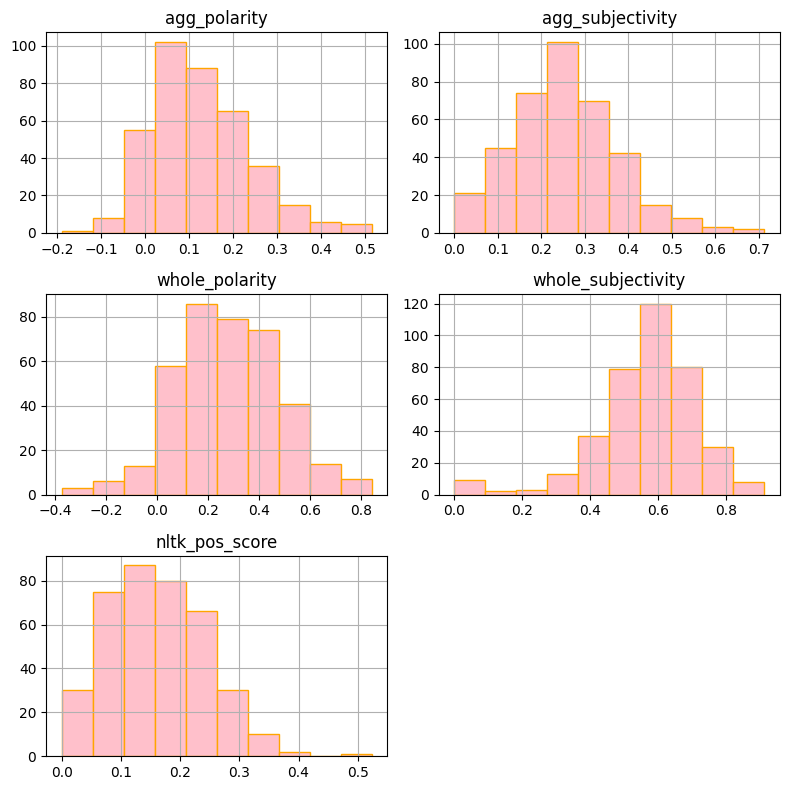

In [75]:
# Create histograms to visualize and compare scores distribution
df0.hist(figsize=[8, 8], bins=10, color = 'pink', edgecolor='orange', lw=0) # lw = line width
plt.tight_layout()
plt.show();

## Box plots by genre `B_category`

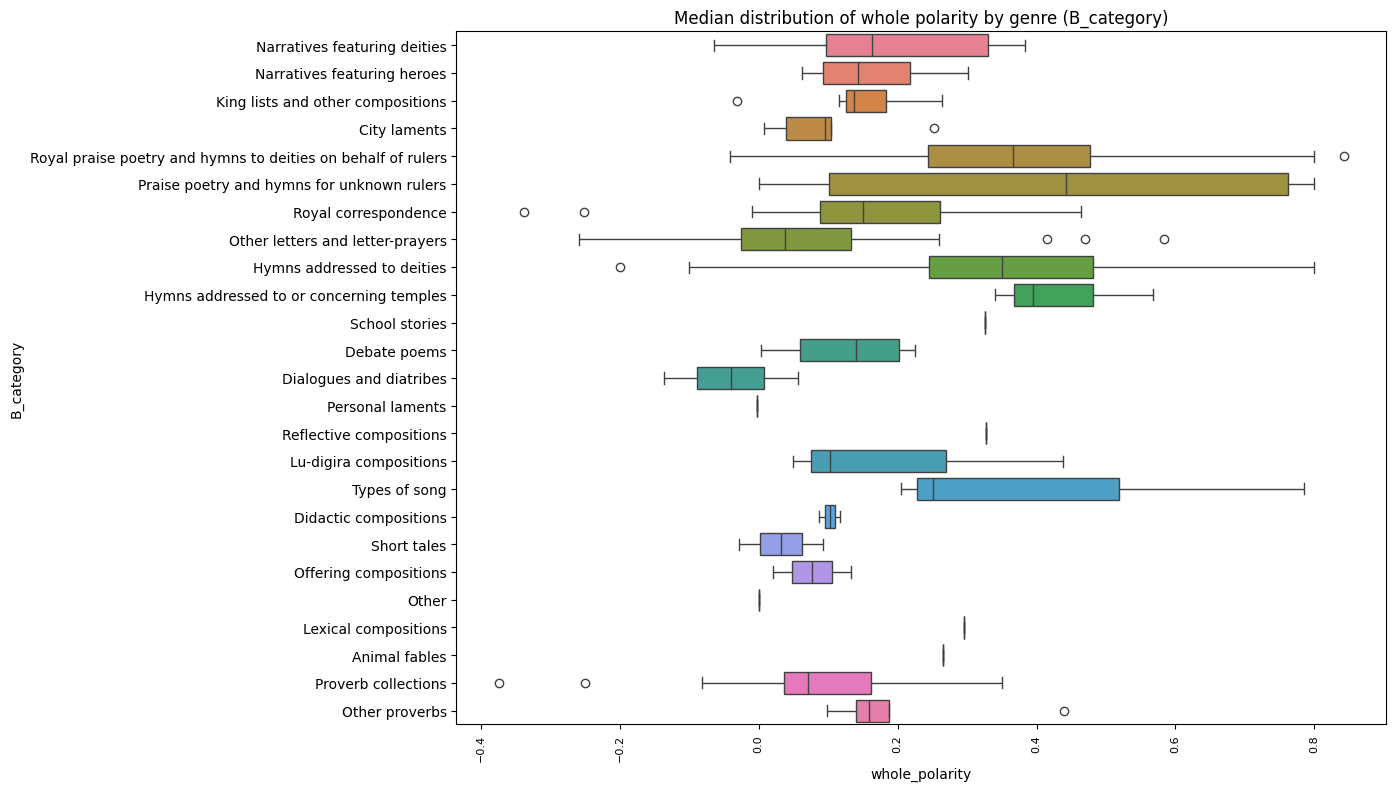

In [76]:
# Create boxplots to visualize whole_polarity (postive to negative) distribution by genre ('B_category')
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=df0, x='whole_polarity', 
                           y='B_category', 
                           hue = 'B_category', 
                           showfliers=True)
genre_median.set_title('Median distribution of whole polarity by genre (B_category)')
plt.xticks(rotation = 90, 
           fontsize = 8);

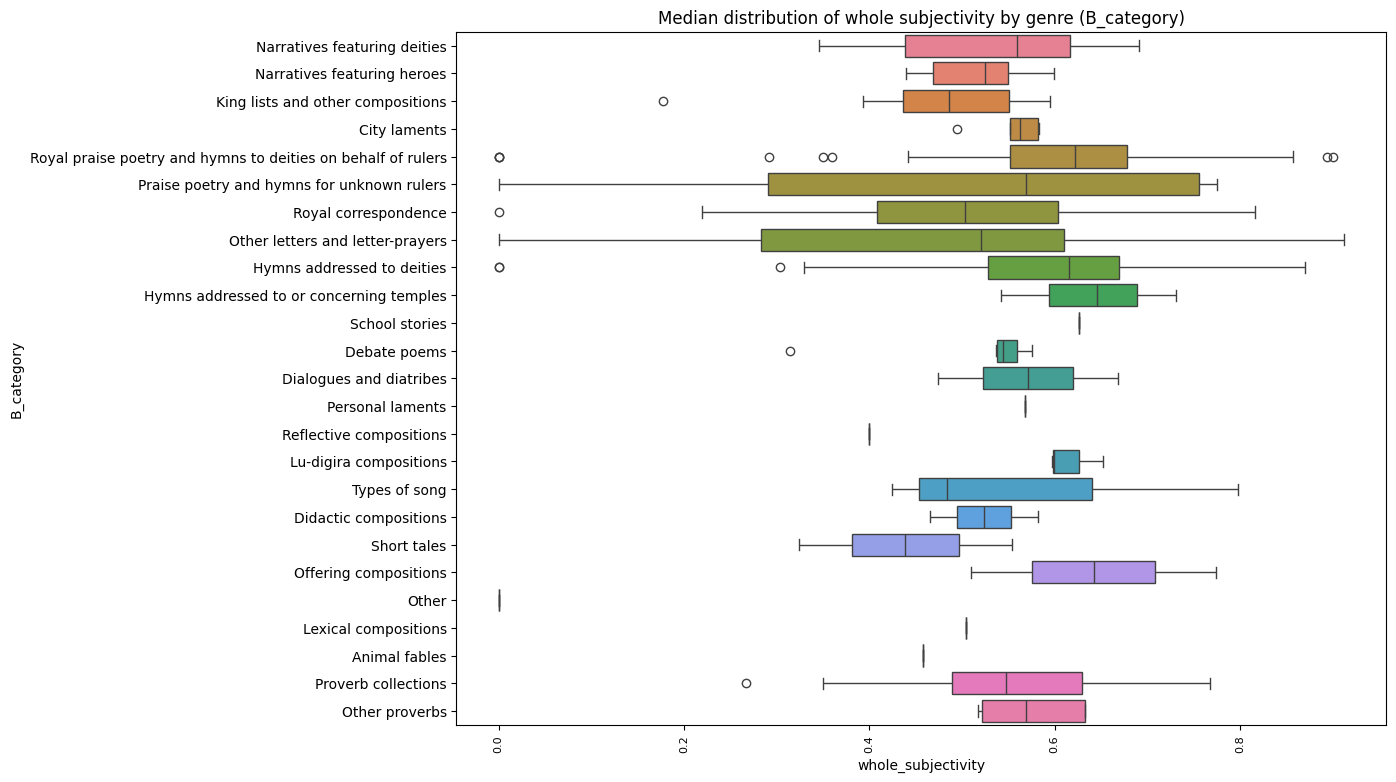

In [77]:
# Create boxplots to visualize whole_subjectivity (truth to opinion) distribution by genres ('B_category')
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=df0, x='whole_subjectivity', y='B_category', hue = 'B_category', showfliers=True)
genre_median.set_title('Median distribution of whole subjectivity by genre (B_category)')
plt.xticks(rotation = 90, fontsize = 8);

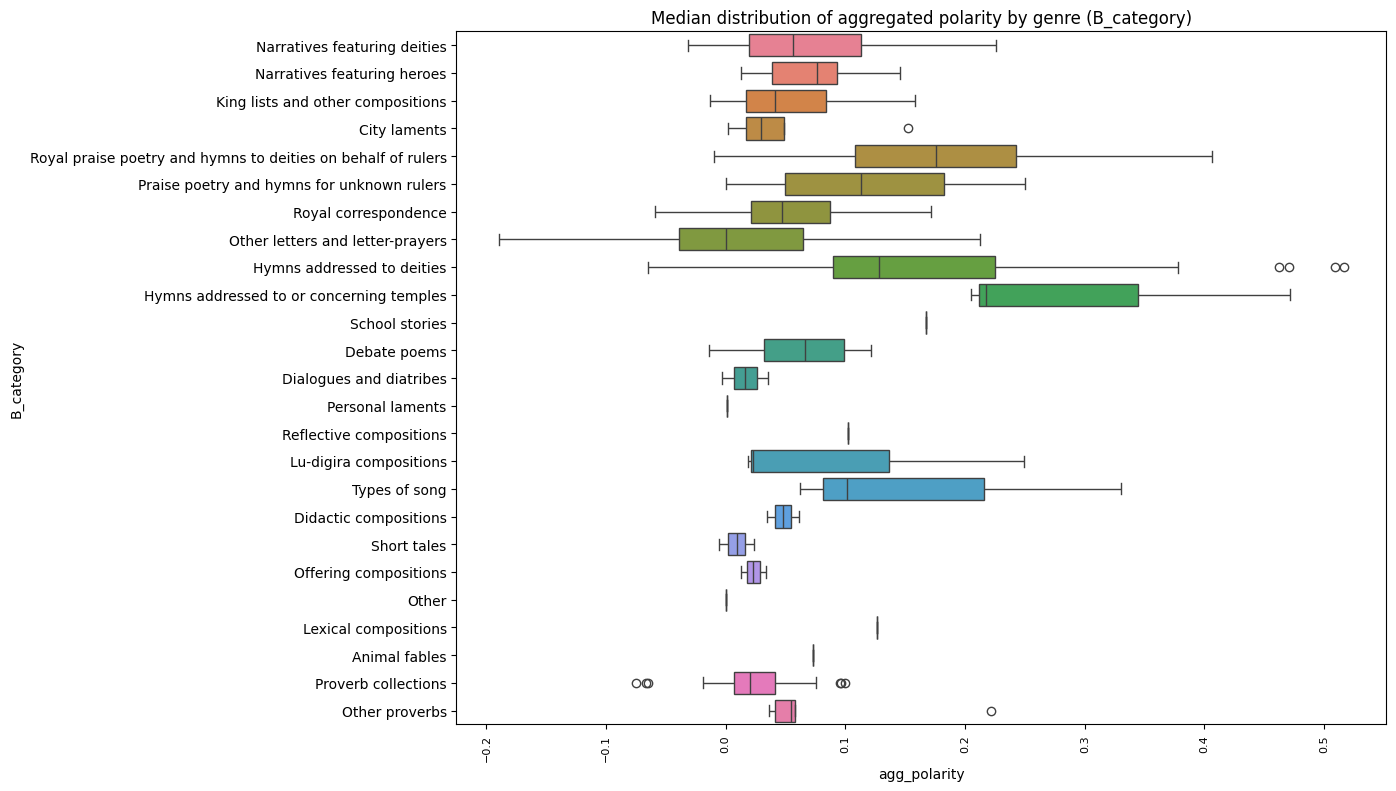

In [78]:
# Create boxplots to visualize agg_polarity distribution by genres ('B_category')
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=df0, x='agg_polarity', y='B_category', hue = 'B_category', showfliers=True)
genre_median.set_title('Median distribution of aggregated polarity by genre (B_category)')
plt.xticks(rotation = 90, fontsize = 8);

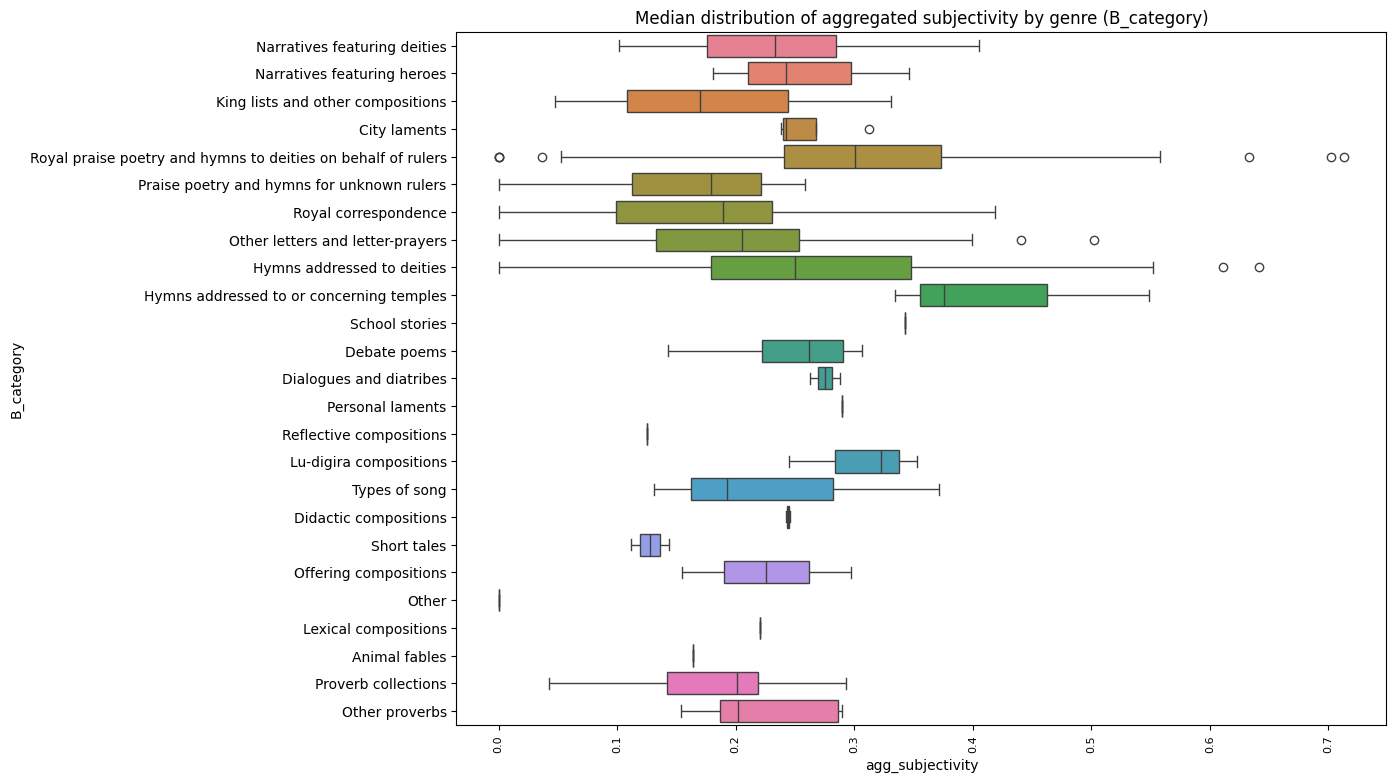

In [79]:
# Create boxplots to visualize agg_subjectivity distribution by genres ('B_category')
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=df0, x='agg_subjectivity', y='B_category', hue = 'B_category', showfliers=True)
genre_median.set_title('Median distribution of aggregated subjectivity by genre (B_category)')
plt.xticks(rotation = 90, fontsize = 8);

### Results of box plots
* shows that the aggregated methods has genres with less subjectivity and more neutral in sentiment
* shows that praise scores high in both positivity and subjectivity

## Get counts for positive and negative sentiments by genre (`B_category`)

In [80]:
df0.B_category.nunique()

25

In [81]:
# Find number of texts per B_category
result = df0.groupby('B_category')['Title'].size().reset_index(name='Count')
print('Number of genres:', result.B_category.nunique())
result.head()

Number of genres: 25


,B_category,Count
0,Animal fables,1
1,City laments,5
2,Debate poems,6
3,Dialogues and diatribes,2
4,Didactic compositions,2


### Find genre with highest number of negative texts of `whole_polarity score`
* use median as threshold

In [82]:
# Find the threshold for low ratings based on median whole_polarity score
threshold = df0['whole_polarity'].median()
print('threshold:', threshold)

threshold: 0.2741666666666666


In [83]:
# Group genre and count texts with ratings below threshold
low_score_counts = df0[sentiment_numbers['whole_polarity'] < threshold].groupby('B_category').size()
low_score_counts.info()

<class 'pandas.core.series.Series'>
Index: 21 entries, Animal fables to Types of song
Series name: None
Non-Null Count  Dtype
--------------  -----
21 non-null     int64
dtypes: int64(1)
memory usage: 336.0+ bytes


In [84]:
# Find group with the max count of low-rated texts
# Create an index that corresponds to the highest count of low-rated texts
# (low_score_counts is a Series with genres as index and counts as values)
most_low_score_count = low_score_counts.max()
genre_with_most_low_scores = low_score_counts.idxmax()

print(f'Genre with the most low-scored compositions is:') 
print(f'{genre_with_most_low_scores} with {most_low_score_count} low-rated compositions')

Genre with the most low-scored compositions is:
Hymns addressed to deities with 33 low-rated compositions


##### Note: likely because this genre has the most texts

In [85]:
# Get the top genres with the most low-rated items
top_5_low_scores = low_score_counts.nlargest(5).reset_index(name='low_score_counts')

print('Genre with the lowest rated compositions:')
print(top_5_low_scores.head())

Genre with the lowest rated compositions:
                                          B_category  low_score_counts
0                         Hymns addressed to deities                33
1  Royal praise poetry and hymns to deities on be...                33
2                                Proverb collections                24
3                               Royal correspondence                21
4                       Narratives featuring deities                18


In [86]:
# Get text counts for each category
unique_values = df0['B_category'].value_counts()
unique_values

B_category
Royal praise poetry and hymns to deities on behalf of rulers    122
Hymns addressed to deities                                      104
Narratives featuring deities                                     26
Proverb collections                                              26
Royal correspondence                                             26
Other letters and letter-prayers                                 17
Narratives featuring heroes                                      10
King lists and other compositions                                 7
Debate poems                                                      6
Other proverbs                                                    5
City laments                                                      5
Praise poetry and hymns for unknown rulers                        4
Hymns addressed to or concerning temples                          3
Lu-digira compositions                                            3
Types of song                        

In [87]:
# Calculate percentages
percentages = (low_score_counts / unique_values) * 100

# Identify the genre with the highest percentage
genre_with_highest_percentage = percentages.idxmax()
highest_percentage = percentages.max()

print(f'The genre with the highest percentage of low-rated compositions is:')
print(f'{genre_with_highest_percentage} with {highest_percentage:.2f}% low-rated compositions')

The genre with the highest percentage of low-rated compositions is:
Animal fables with 100.00% low-rated compositions


### Highest number of positive texts

In [88]:
# Group genre and count texts with ratings above threshold
high_score_counts = df0[sentiment_numbers['whole_polarity'] >= threshold].groupby('B_category').size()
high_score_counts.info()

<class 'pandas.core.series.Series'>
Index: 15 entries, Hymns addressed to deities to Types of song
Series name: None
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 240.0+ bytes


In [89]:
# Find genre with the max count of high-rated texts
# Create an index that corresponds to the highest count of high-rated texts 
genre_with_most_high_scores = high_score_counts.idxmax()
most_high_score_count = high_score_counts.max()

print(f'Genre with the most highest scored compositions is:')  
print(f'{genre_with_most_high_scores} with {most_high_score_count} high-rated compositions')

Genre with the most highest scored compositions is:
Royal praise poetry and hymns to deities on behalf of rulers with 89 high-rated compositions


In [90]:
# Get the top genres with the most high-rated items
top_5_high_scores = high_score_counts.nlargest(5).reset_index(name='high_score_counts')

print('Genre with the highest rated compositions:')
print(top_5_high_scores.head())

Genre with the highest rated compositions:
                                          B_category  high_score_counts
0  Royal praise poetry and hymns to deities on be...                 89
1                         Hymns addressed to deities                 71
2                       Narratives featuring deities                  8
3                               Royal correspondence                  5
4           Hymns addressed to or concerning temples                  3


In [91]:
# Calculate percentages
percentages = (high_score_counts / unique_values) * 100

# Identify the genre with the highest percentage
genre_with_highest_percentage = percentages.idxmax()
highest_percentage = percentages.max()

print(f'The genre with the highest percentage of high-rated compositions is:')
print(f'{genre_with_highest_percentage} with {highest_percentage:.2f}% high-rated compositions')

The genre with the highest percentage of high-rated compositions is:
Hymns addressed to or concerning temples with 100.00% high-rated compositions


### Create table with high & low scores & number of texts per genre

In [92]:
# Type 'low_score_counts' as INT
low_score_counts = low_score_counts.reset_index(name='low_score_counts').astype({'low_score_counts': 'int'})
print(low_score_counts.info())
low_score_counts.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   B_category        21 non-null     object
 1   low_score_counts  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


,B_category,low_score_counts
0,Animal fables,1
1,City laments,5


In [93]:
# Type 'high_score_counts' as INT
high_score_counts = high_score_counts.reset_index(name='high_score_counts').astype({'high_score_counts': 'int'})
print(high_score_counts.info())
high_score_counts.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   B_category         15 non-null     object
 1   high_score_counts  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes
None


,B_category,high_score_counts
0,Hymns addressed to deities,71
1,Hymns addressed to or concerning temples,3


In [94]:
# Merge high and low count tables
df_joined = low_score_counts.merge(high_score_counts[['B_category','high_score_counts']],on='B_category', how='outer') # 'outer' includes all keys
print(df_joined.info())
df_joined.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   B_category         25 non-null     object 
 1   low_score_counts   21 non-null     float64
 2   high_score_counts  15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 732.0+ bytes
None


,B_category,low_score_counts,high_score_counts
0,Animal fables,1.0,NaN
1,City laments,5.0,NaN


In [95]:
# Merge with 'result' (# of texts per B_category)
df_counts = df_joined.merge(result[['B_category','Count']],on='B_category', how='outer')
print(df_counts.info())
df_counts.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   B_category         25 non-null     object 
 1   low_score_counts   21 non-null     float64
 2   high_score_counts  15 non-null     float64
 3   Count              25 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 932.0+ bytes
None


,B_category,low_score_counts,high_score_counts,Count
0,Animal fables,1.0,NaN,1
1,City laments,5.0,NaN,5
2,Debate poems,6.0,NaN,6
3,Dialogues and diatribes,2.0,NaN,2
4,Didactic compositions,2.0,NaN,2
5,Hymns addressed to deities,33.0,71.0,104
6,Hymns addressed to or concerning temples,NaN,3.0,3
7,King lists and other compositions,7.0,NaN,7
8,Lexical compositions,NaN,1.0,1
9,Lu-digira compositions,2.0,1.0,3


#### Get percentages and counts side by side for comparison

In [96]:
# Convert 'high_score_counts' to integers, filling NaN with 0
df_counts[['high_score_counts', 'low_score_counts']] = df_counts[['high_score_counts', 'low_score_counts']].fillna(0).astype(int)
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   B_category         25 non-null     object
 1   low_score_counts   25 non-null     int64 
 2   high_score_counts  25 non-null     int64 
 3   Count              25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 932.0+ bytes


In [97]:
# Get percentage low scores
# Create feature
df_counts['percentage_lowscore'] = ((df_counts['low_score_counts'] / df_counts['Count']) * 100).round()

In [98]:
# Get percentage high scores
# Create featur
df_counts['percentage_highscore'] = ((df_counts['high_score_counts'] / df_counts['Count']) * 100).round()

In [99]:
df_counts.head()

,B_category,low_score_counts,high_score_counts,Count,percentage_lowscore,percentage_highscore
0,Animal fables,1,0,1,100.0,0.0
1,City laments,5,0,5,100.0,0.0
2,Debate poems,6,0,6,100.0,0.0
3,Dialogues and diatribes,2,0,2,100.0,0.0
4,Didactic compositions,2,0,2,100.0,0.0


In [100]:
# Reorder columns
# Get column indicies
column_info = [(index, col) for index, col in enumerate(df_counts.columns)]
column_info

[(0, 'B_category'),
 (1, 'low_score_counts'),
 (2, 'high_score_counts'),
 (3, 'Count'),
 (4, 'percentage_lowscore'),
 (5, 'percentage_highscore')]

In [101]:
# Reordering columns using iloc
df_counts = df_counts.iloc[:, [0, 1, 4, 2, 5, 3]]
df_counts.columns

Index(['B_category', 'low_score_counts', 'percentage_lowscore',
       'high_score_counts', 'percentage_highscore', 'Count'],
      dtype='object')

In [102]:
# Visualize percentages to counts by descending percentages
descending = df_counts.sort_values(by='percentage_highscore', ascending=False).reset_index(drop=True)
descending.style.background_gradient()

,B_category,low_score_counts,percentage_lowscore,high_score_counts,percentage_highscore,Count
0,School stories,0,0.000000,1,100.000000,1
1,Hymns addressed to or concerning temples,0,0.000000,3,100.000000,3
2,Lexical compositions,0,0.000000,1,100.000000,1
3,Reflective compositions,0,0.000000,1,100.000000,1
4,Royal praise poetry and hymns to deities on behalf of rulers,33,27.000000,89,73.000000,122
5,Hymns addressed to deities,33,32.000000,71,68.000000,104
6,Praise poetry and hymns for unknown rulers,2,50.000000,2,50.000000,4
7,Types of song,2,67.000000,1,33.000000,3
8,Lu-digira compositions,2,67.000000,1,33.000000,3
9,Narratives featuring deities,18,69.000000,8,31.000000,26


### Results
*100% positive*
* School stories, Hymns addressed to or concerning temples, Lexical compositions, Reflective compositions
  
*100% low scores*
* Short tales, Animal fables, Personal laments, Other, City laments, King lists and other compositions, Didactic compositions, Dialogues and diatribes, Debate poems, Offering compositions
  
*Next highest percentage of positive text: hymns and prayers*
* Royal praise poetry and hymns to deities on behalf of rulers, Hymns addressed to deities
  
*Next highest percentage of low scores text: correspondence*
* Proverb collections, Other letters and letter-prayers, Royal correspondence

It is of note that Narratives featuring heroes and Narratives featuring deities also returned a ~70% low scores

## Visuals by god (`God`)

In [103]:
# Remove texts which do not feature gods by subsetting
only_gods = sentiment_numbers.copy()
only_gods.dropna(subset = ['God'], inplace=True)
only_gods.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 346
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   B_category          238 non-null    object 
 1   God                 238 non-null    object 
 2   Person              97 non-null     object 
 3   Number              238 non-null    object 
 4   Title               238 non-null    object 
 5   agg_polarity        238 non-null    float64
 6   agg_subjectivity    238 non-null    float64
 7   whole_polarity      238 non-null    float64
 8   whole_subjectivity  238 non-null    float64
 9   nltk_pos_score      238 non-null    float64
dtypes: float64(5), object(5)
memory usage: 20.5+ KB


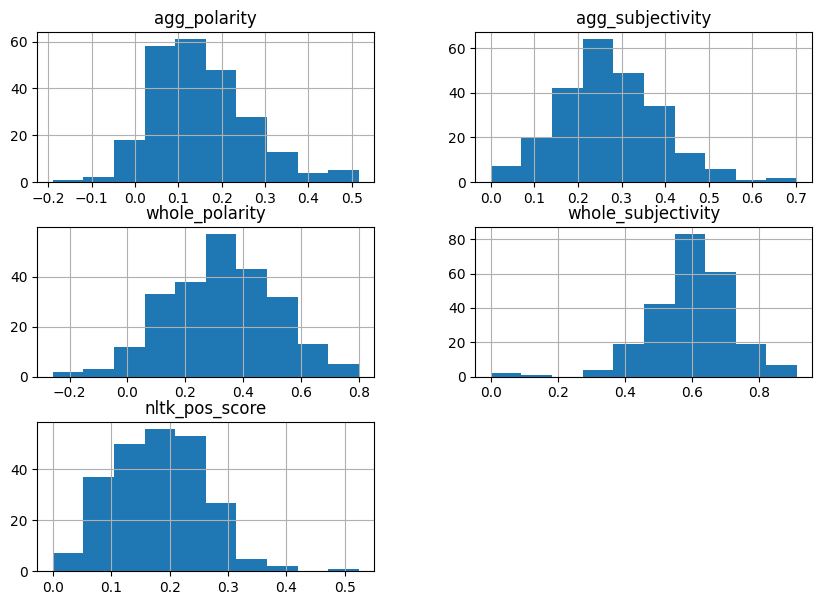

In [104]:
# Create histograms to visualize and compare scores distribution
only_gods.hist(figsize=[10, 7], bins=10);

### Boxplots

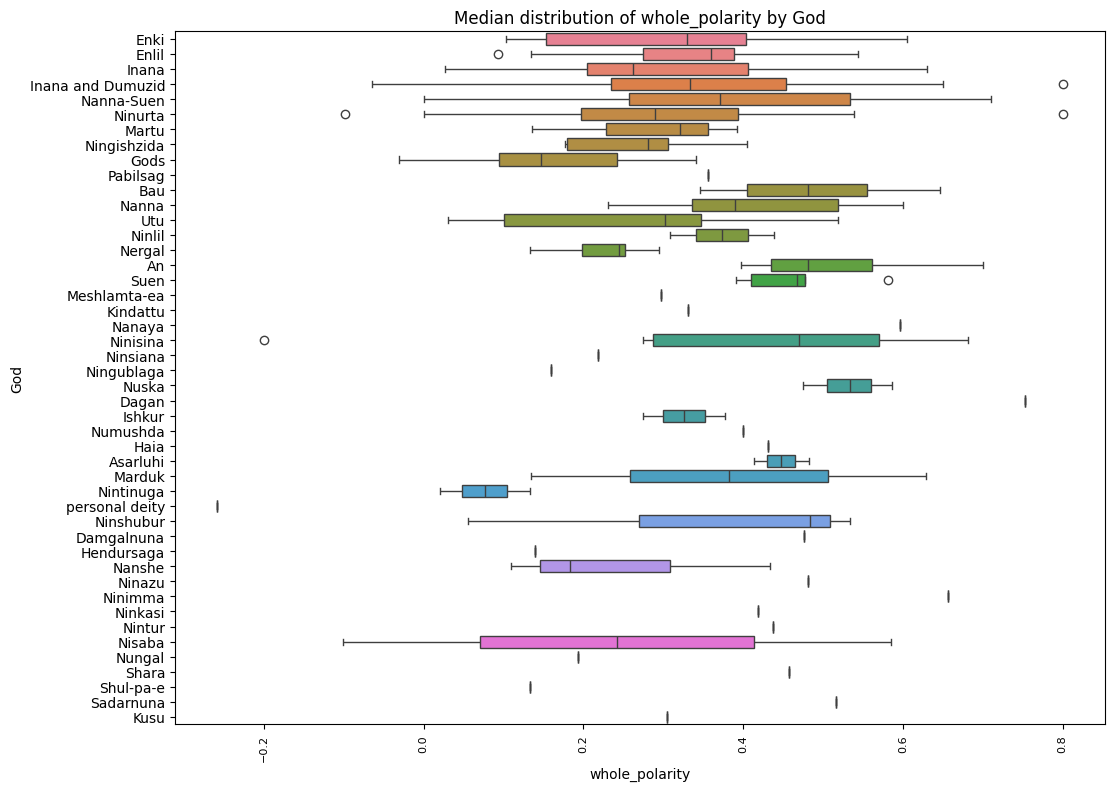

In [105]:
# Create boxplots to visualize whole_polarity distribution by God
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=only_gods, 
                           x='whole_polarity', 
                           y='God', 
                           hue='God', 
                           showfliers=True)
genre_median.set_title('Median distribution of whole_polarity by God')
plt.xticks(rotation = 90, fontsize = 8);

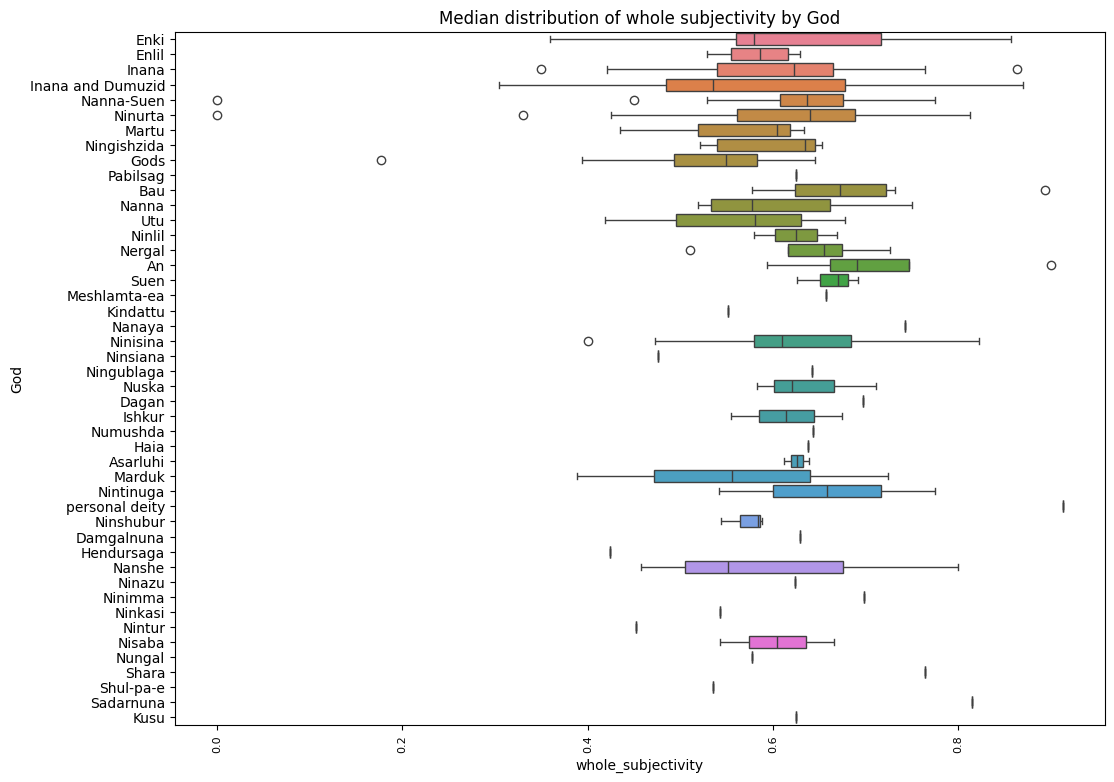

In [106]:
# Create boxplots to visualize whole_subjectivity distribution by God
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=only_gods, x='whole_subjectivity', y='God', hue='God', showfliers=True)
genre_median.set_title('Median distribution of whole subjectivity by God')
plt.xticks(rotation = 90, fontsize = 8);

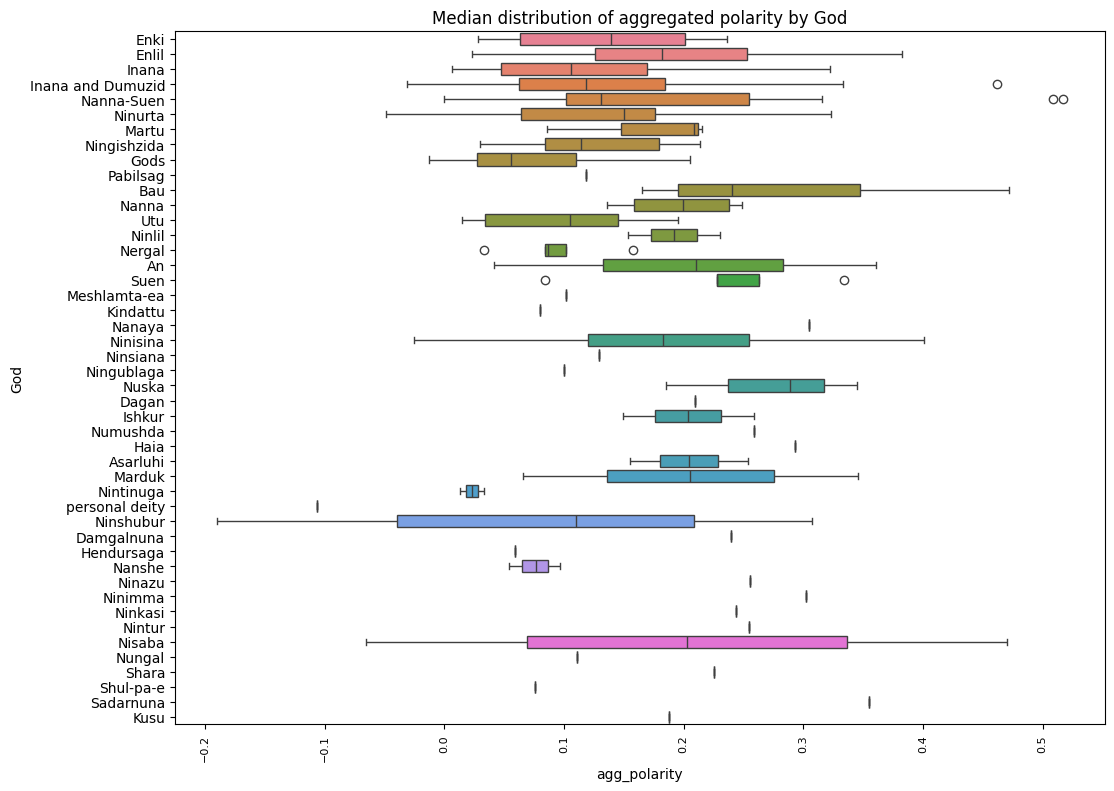

In [107]:
# Create boxplots to visualize agg_polarity distribution by God
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=only_gods, x='agg_polarity', y='God', hue='God', showfliers=True)
genre_median.set_title('Median distribution of aggregated polarity by God')
plt.xticks(rotation = 90, fontsize = 8);

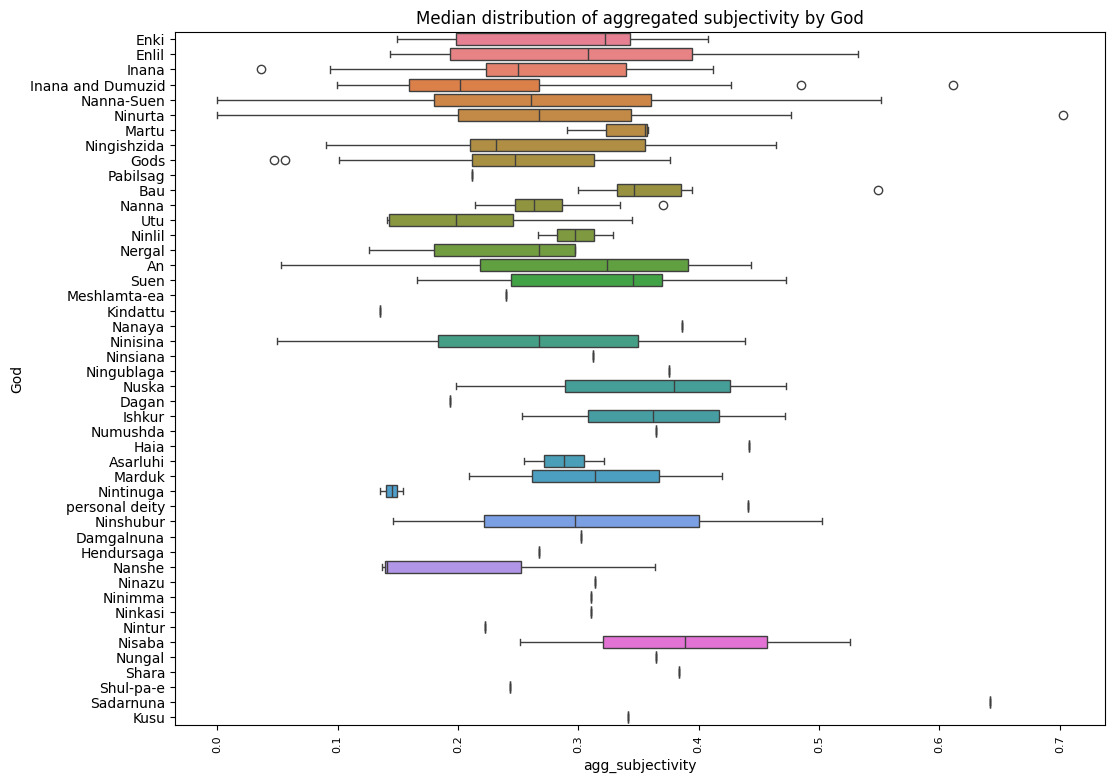

In [108]:
# Create boxplots to visualize agg_subjectivity distribution by God
plt.figure(figsize=(12,9))
genre_median = sns.boxplot(data=only_gods, x='agg_subjectivity', y='God', hue = 'God', showfliers=True)
genre_median.set_title('Median distribution of aggregated subjectivity by God')
plt.xticks(rotation = 90, fontsize = 8);

### Find god with highest number of negative texts of `whole_polarity score`

In [109]:
# Find number of texts per god
result2 = only_gods.groupby('God')['Title'].size().reset_index(name='Count')
print('Number of gods is:', result2.God.nunique())
result2.head()

Number of gods is: 46


,God,Count
0,An,4
1,Asarluhi,2
2,Bau,6
3,Dagan,1
4,Damgalnuna,1


In [110]:
# Find the threshold for low ratings based on median whole_polarity score
threshold = only_gods['whole_polarity'].median()
print('threshold:', threshold)

threshold: 0.3301694893833566


In [111]:
# Group god and count texts with ratings below threshold
low_score_counts2 = only_gods[only_gods['whole_polarity'] < threshold].groupby('God').size()
low_score_counts2.info()

<class 'pandas.core.series.Series'>
Index: 28 entries, Enki to personal deity
Series name: None
Non-Null Count  Dtype
--------------  -----
28 non-null     int64
dtypes: int64(1)
memory usage: 448.0+ bytes


In [112]:
# Create an index that corresponds to the highest count of low-rated texts
# Find group with the max count of low-rated texts
god_with_most_low_scores = low_score_counts2.idxmax()
most_low_score_count2 = low_score_counts2.max()

print(f'God with the most low-scored compositions is:') 
print(f'{god_with_most_low_scores} with {most_low_score_count2} low-rated compositions')

God with the most low-scored compositions is:
Gods with 22 low-rated compositions


In [113]:
# Get the top gods with the most low-rated items
top_5_low_scores2 = low_score_counts2.nlargest(5).reset_index(name='low_score_counts')

print('Gods with the lowest rated compositions:')
print(top_5_low_scores2.head())

Gods with the lowest rated compositions:
                 God  low_score_counts
0               Gods                22
1              Inana                16
2  Inana and Dumuzid                16
3            Ninurta                11
4         Nanna-Suen                 7


In [114]:
# Get text counts for each god
god_values = only_gods['God'].value_counts()
god_values.head()

God
Inana and Dumuzid    32
Inana                25
Gods                 24
Nanna-Suen           20
Ninurta              19
Name: count, dtype: int64

In [115]:
# Calculate percentages
percentages2 = (low_score_counts2 / god_values) * 100

# Identify the genre with the highest percentage
god_with_highest_percentage = percentages2.idxmax()
highest_percentage2 = percentages2.max()

print(f'The god with the highest percentage of low-rated compositions is:') 
print(f'{god_with_highest_percentage} with {highest_percentage2:.2f}% low-rated compositions')

The god with the highest percentage of low-rated compositions is:
Hendursaga with 100.00% low-rated compositions


### Highest number of positive texts

In [116]:
# Group god and count texts with ratings above threshold
high_score_counts2 = only_gods[only_gods['whole_polarity'] >= threshold].groupby('God').size()
high_score_counts2.info()

<class 'pandas.core.series.Series'>
Index: 36 entries, An to Utu
Series name: None
Non-Null Count  Dtype
--------------  -----
36 non-null     int64
dtypes: int64(1)
memory usage: 576.0+ bytes


In [117]:
# Find god with the max count of high-rated texts
# Create an index that corresponds to the highest count of high-rated texts
god_with_most_high_scores = high_score_counts2.idxmax()
most_high_score_count2 = high_score_counts2.max()

print(f'God with the most high-scored compositions is:') 
print(f'{god_with_most_high_scores} with {most_high_score_count2} high-rated compositions')

God with the most high-scored compositions is:
Inana and Dumuzid with 16 high-rated compositions


In [118]:
# Get the top godss with the most high-rated items
top_5_high_scores2 = high_score_counts2.nlargest(5).reset_index(name='high_score_counts')

print('Gods with the highest rated compositions:')
print(top_5_high_scores2.head())

Gods with the highest rated compositions:
                 God  high_score_counts
0  Inana and Dumuzid                 16
1         Nanna-Suen                 13
2              Inana                  9
3              Enlil                  8
4            Ninurta                  8


### Create table with high & low scores & number of texts per god

In [119]:
# Type 'low_score_counts' as INT
low_god_score_counts = low_score_counts2.reset_index(name='low_score_counts').astype({'low_score_counts': 'int'})
print(low_god_score_counts.info())
low_god_score_counts.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   God               28 non-null     object
 1   low_score_counts  28 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 580.0+ bytes
None


,God,low_score_counts
0,Enki,5
1,Enlil,5


In [120]:
# Type 'high_score_counts' as INT
high_god_score_counts = high_score_counts2.reset_index(name='high_score_counts').astype({'high_score_counts': 'int'})
print(high_god_score_counts.info())
high_god_score_counts.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   God                36 non-null     object
 1   high_score_counts  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes
None


,God,high_score_counts
0,An,4
1,Asarluhi,2


In [121]:
# Merge high and low count tables
df_joined2 = low_god_score_counts.merge(high_god_score_counts[['God','high_score_counts']],on='God', how='outer')
print(df_joined2.info())
df_joined2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   God                46 non-null     object 
 1   low_score_counts   28 non-null     float64
 2   high_score_counts  36 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None


,God,low_score_counts,high_score_counts
0,An,NaN,4.0
1,Asarluhi,NaN,2.0


In [122]:
# Merge with 'result2' (# of texts per God)
df_counts2 = df_joined2.merge(result2[['God','Count']],on='God', how='outer')
print(df_counts2.info())
df_counts2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   God                46 non-null     object 
 1   low_score_counts   28 non-null     float64
 2   high_score_counts  36 non-null     float64
 3   Count              46 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB
None


,God,low_score_counts,high_score_counts,Count
0,An,NaN,4.0,4
1,Asarluhi,NaN,2.0,2
2,Bau,NaN,6.0,6
3,Dagan,NaN,1.0,1
4,Damgalnuna,NaN,1.0,1
5,Enki,5.0,6.0,11
6,Enlil,5.0,8.0,13
7,Gods,22.0,2.0,24
8,Haia,NaN,1.0,1
9,Hendursaga,1.0,NaN,1


#### Get percentages and counts side by side for comparison

In [123]:
# Convert 'high_score_counts' to integers, filling NaN with 0
df_counts2[['high_score_counts', 'low_score_counts']] = df_counts2[['high_score_counts', 'low_score_counts']].fillna(0).astype(int)
df_counts2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   God                46 non-null     object
 1   low_score_counts   46 non-null     int64 
 2   high_score_counts  46 non-null     int64 
 3   Count              46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [124]:
# Get percentage low scores
df_counts2['percentage_lowscore'] = ((df_counts2['low_score_counts'] / df_counts2['Count']) * 100)

In [125]:
# Get percentage high scores
df_counts2['percentage_highscore'] = ((df_counts2['high_score_counts'] / df_counts2['Count']) * 100)

In [126]:
df_counts2.head()

,God,low_score_counts,high_score_counts,Count,percentage_lowscore,percentage_highscore
0,An,0,4,4,0.0,100.0
1,Asarluhi,0,2,2,0.0,100.0
2,Bau,0,6,6,0.0,100.0
3,Dagan,0,1,1,0.0,100.0
4,Damgalnuna,0,1,1,0.0,100.0


#### Reorder columns

In [127]:
column_info = [(index, col) for index, col in enumerate(df_counts2.columns)]
column_info

[(0, 'God'),
 (1, 'low_score_counts'),
 (2, 'high_score_counts'),
 (3, 'Count'),
 (4, 'percentage_lowscore'),
 (5, 'percentage_highscore')]

In [128]:
# Reordering columns using iloc
df_counts2 = df_counts2.iloc[:, [0, 1, 4, 2, 5, 3]]
df_counts2.columns

Index(['God', 'low_score_counts', 'percentage_lowscore', 'high_score_counts',
       'percentage_highscore', 'Count'],
      dtype='object')

In [129]:
# Get 100% positive gods
all_high = df_counts2.loc[df_counts2['percentage_highscore'] == 100]
print(all_high.God.nunique(), 'gods:', all_high.God.unique(), 'have only 100% positive texts')

18 gods: ['An' 'Asarluhi' 'Bau' 'Dagan' 'Damgalnuna' 'Haia' 'Kindattu' 'Nanaya'
 'Ninazu' 'Ninimma' 'Ninkasi' 'Nintur' 'Numushda' 'Nuska' 'Pabilsag'
 'Sadarnuna' 'Shara' 'Suen'] have only 100% positive texts


In [130]:
# Get 100% low scores gods
all_low = df_counts2.loc[df_counts2['percentage_lowscore'] == 100]
print(all_low.God.nunique(), 'gods:', all_low.God.unique(), 'have only 100% neutral or more negative texts')

10 gods: ['Hendursaga' 'Kusu' 'Meshlamta-ea' 'Nergal' 'Ningublaga' 'Ninsiana'
 'Nintinuga' 'Nungal' 'Shul-pa-e' 'personal deity'] have only 100% neutral or more negative texts


#### Create center chart

In [131]:
# Get center gods
center = df_counts2.loc[(df_counts2['percentage_highscore'] != 100) & (df_counts2['percentage_lowscore'] != 100)]
center

,God,low_score_counts,percentage_lowscore,high_score_counts,percentage_highscore,Count
5,Enki,5,45.454545,6,54.545455,11
6,Enlil,5,38.461538,8,61.538462,13
7,Gods,22,91.666667,2,8.333333,24
10,Inana,16,64.000000,9,36.000000,25
11,Inana and Dumuzid,16,50.000000,16,50.000000,32
12,Ishkur,1,50.000000,1,50.000000,2
15,Marduk,1,50.000000,1,50.000000,2
16,Martu,2,66.666667,1,33.333333,3
19,Nanna,3,30.000000,7,70.000000,10
20,Nanna-Suen,7,35.000000,13,65.000000,20


In [132]:
# Get above 50%% positive gods
over_fifty = center.loc[center['percentage_highscore'] > 50]
print(over_fifty.God.nunique(), 'gods:', over_fifty.God.unique(), 'have more than 50% positive texts')

6 gods: ['Enki' 'Enlil' 'Nanna' 'Nanna-Suen' 'Ninisina' 'Ninshubur'] have more than 50% positive texts


In [133]:
# Get 50%% positive gods
fifty = center.loc[center['percentage_highscore'] == 50]
print(fifty.God.nunique(), 'gods:', fifty.God.unique(), 'have 50% positive texts')

5 gods: ['Inana and Dumuzid' 'Ishkur' 'Marduk' 'Ninlil' 'Nisaba'] have 50% positive texts


In [134]:
# Get under 50%% positive gods
under_fifty = center.loc[center['percentage_highscore'] < 50]
print(under_fifty.God.nunique(), 'gods:', under_fifty.God.unique(), 'have fewer than 50% positive texts')

7 gods: ['Gods' 'Inana' 'Martu' 'Nanshe' 'Ningishzida' 'Ninurta' 'Utu'] have fewer than 50% positive texts


In [135]:
# Simplify df for ease
center2 = center[['God', 'percentage_highscore', 'percentage_lowscore', 'Count']]
center2.head(2)

,God,percentage_highscore,percentage_lowscore,Count
5,Enki,54.545455,45.454545,11
6,Enlil,61.538462,38.461538,13


In [136]:
# Create attractive chart of the middle
format_dict = {
    'percentage_lowscore': '{:.1f}%',
    'percentage_highscore': '{:.1f}%'
}

# Sort by 'percentage_highscore'
df_sorted = center2.sort_values(by='Count', ascending=False).reset_index(drop=True)
descending_gods = df_sorted.head(5)

# Format
descending_gods = descending_gods.style.format(format_dict)
descending_gods.background_gradient()

,God,percentage_highscore,percentage_lowscore,Count
0,Inana and Dumuzid,50.0%,50.0%,32
1,Inana,36.0%,64.0%,25
2,Gods,8.3%,91.7%,24
3,Nanna-Suen,65.0%,35.0%,20
4,Ninurta,42.1%,57.9%,19


In [137]:
# Check Nanna-Suen, Nana, and Suen
nana_rows = df_counts2[(df_counts2['God']).isin(['Nanna-Suen', 'Nanna', 'Suen'])].reset_index(drop=True)
print('Total Nana-Suen texts:', nana_rows.Count.sum())
nana_rows

Total Nana-Suen texts: 35


,God,low_score_counts,percentage_lowscore,high_score_counts,percentage_highscore,Count
0,Nanna,3,30.0,7,70.0,10
1,Nanna-Suen,7,35.0,13,65.0,20
2,Suen,0,0.0,5,100.0,5


#### Results
18 gods: ['An' 'Asarluhi' 'Bau' 'Dagan' 'Damgalnuna' 'Haia' 'Kindattu' 'Nanaya'
 'Ninazu' 'Ninimma' 'Ninkasi' 'Nintur' 'Numushda' 'Nuska' 'Pabilsag'
 'Sadarnuna' 'Shara' 'Suen'] have only 100% positive texts

10 gods: ['Hendursaga' 'Kusu' 'Meshlamta-ea' 'Nergal' 'Ningublaga' 'Ninsiana'
 'Nintinuga' 'Nungal' 'Shul-pa-e' 'personal deity'] have only 100% neutral or more negative texts

6 gods: ['Enki' 'Enlil' 'Nanna' 'Nanna-Suen' 'Ninisina' 'Ninshubur'] have more than 50% positive texts
 
5 gods: ['Inana and Dumuzid' 'Ishkur' 'Marduk' 'Ninlil' 'Nisaba'] have 50% positive texts

7 gods: ['Gods' 'Inana' 'Martu' 'Nanshe' 'Ningishzida' 'Ninurta' 'Utu'] have fewer than 50% positive textss

##### Further insights
Inana and Dumuzid have 32 texts & break even with 16 pos & 16 neu/neg.\
Nanna-Suen has 20 texts, with 13 positives\
Inana has 25 texts, with 9 positive\
Ninurta has 19 & Enlil 13, but both have 8 positive

Most less positive \
It is interesting that the gods as a whole have 24 texts, with a whopping 22 being less positive\
Inana alone has 25 texts, with 16 less positive\
Again, Inana and Dumuzid have 32 texts & break even with 16 pos & 16 neu/neg.\
Ninurta has 19 texts, but 11 are less positive